### Goal
The goal of this program is to be able to plot the distribution of the data for each channel in all the Front-End Mother Boards (FEMBs)

## Structure of the data data_log[keys_data[0]]
<b>0: </b> RMS<br/>
<b>1: </b> Pedestal value<br/>
<b>2: </b> Positive peak<br/>
<b>3: </b> Negative peak<br/>
<b>4: </b> One waveform<br/>
<b>5: </b> Average waveform<br/>
<br/>
<h2>Workflow</h2><br/>
<b>* Get the list of the FEMBs directories</b><br/>
<b>* Get the list of '.bin' files in one FEMB folder</b><br/>
<b>* Read one '.bin' file, need the index of the bin file from the list and the index of the FEMB folder</b><br/>
<b>* Get a list of the avalaible h5 filepath from the dictionary ouput of the previous function => keys</b><br/>
<b>* Get a list of all h5 files (only the name NOT the path)</b><br/>
<b>* ==> YOU get something like data_log[keys_data[index_key]]</b><br/>
<b>* Choose which information we want to plot by specifying its index: RMS, Pedestal, positive peak, negative peak, one waveform or average waveform</b><br/>
<b>* Get this information for all the FEMBs</b> <br/>
<b>===> PLOT THE DISTRIBUTION OF THIS DATA AND SAVE IF IN A '.png' FILE</b>

In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def getFEMB_dir(mainDir):
    # get a list of the FEMB directories
    return [os.path.join(mainDir, f) for f in os.listdir(mainDir)]

def get_bin_list(source_DIR):
    '''
    This function gets the list of files having the extension '.bin'
    in the source_DIR which is a path to a FEMB data
    '''
    files = []
    for f in os.listdir(source_DIR):
        if '.bin' in f:
            files.append(f)
    return files

def read_bin(file_path):
    '''
    This function reads file_path which has the extension '.bin'
    '''
    with open(file_path, 'rb') as fp:
        return pickle.load(fp)

def get_keys(data_pickle, h5='h5'):
    '''
    This function returns the keys in the dictionary as a list
    '''
    keys = []
    ish5 = (h5=='h5')
    if ish5:
        for l in list(data_pickle.keys()):
            if '.h5' in l:
                keys.append(l)
    else:
        keys = list(data_pickle.keys())
    return keys

def get_h5filenames(mainDir='../data', indexBin=5):
    femb = getFEMB_dir(mainDir)[0]
    oneBin = get_bin_list(femb)[indexBin]
    binDataLog = read_bin(os.path.join(femb, oneBin))
    keys = get_keys(binDataLog,'h5')
    # keys has to be a list to be able to use this function
    filenames = []
    for f in keys:
        f_split = f.split('/')
        # normally the filename is at the end of the list generated
        # let's use the index -1 to get the element located at the end of the list
        filenames.append(f_split[-1])
    return filenames

# Function to change the dirname in a key
def changeDirInKey(key, dirname):
    key_splitted = key.split('/')
    key_splitted[-3] = dirname
    # combine the keys to get a new path
    pathname = key_splitted[0]
    for i, k in enumerate(key_splitted):
        if i != 0:
            pathname = os.path.join(pathname, k)
    return pathname

def printInfo(label, info):
    print('*' * 100)
    print('*', label, ' : ')
    if type(info)==list:
        for f in info:
            print('*\t', f,'\n')
    else:
        print('*\t', info, '\n')
    print('*' * 100)

def exploreFEMBData(mainDir, indexFEMB):
    # FEMBs
    fembs = getFEMB_dir(mainDir)
    printInfo('FEMB directories', fembs)
    # list of bin files for the first FEMB folder
    bin_list = get_bin_list(fembs[0])
    printInfo('List of bin files', bin_list)
    # get keys from the one bin data
    data_log = read_bin(os.path.join(fembs[0], bin_list[5]))
    data_keys = get_keys(data_log, 'h5')
    printInfo('Keys corresponding to the femb', data_keys)
    #-> we can get data by writing: data_log[data_keys[indexKey]][indexData]
    #print(bin_list[5], ' - logs_tm006.bin')
    
def getDistribution(mainDir='../data', outputDir='distributionPNG', indexh5=0, indexBin=5, indexData=0, histBin=100):
    dataName = {0: 'RMS',
               1: 'pedestal',
               2: 'positive_peak',
               3: 'negative_peak',
               4: 'one_waveform',
               5: 'average_waveform'}
    printInfo('dataname', dataName[indexData])
    ## try to create a folder named dataName[indexData]
    try:
        os.mkdir(os.path.join(outputDir, dataName[indexData]))
    except:
        pass
    # get h5 key corresponding to indexh5
    h5_filename = get_h5filenames()[indexh5]
    printInfo('Name of the h5 file', h5_filename)
    
    # set variable to store the data
    dataVar = []
    
    ## get FEMBs dir
    fembs = getFEMB_dir(mainDir)
    
    for femb in fembs:
        # get list of bin files
        bin_list = get_bin_list(femb)
        printInfo('Name of the bin file', bin_list[indexBin])
        # read the data corresponding to indexBin
        data_log = read_bin(os.path.join(femb, bin_list[indexBin]))
        dataKey = get_keys(data_log, 'h5')[indexh5] # get one key corresponding to indexh5
        printInfo('dataKey', dataKey)
        # append data corresponding to indexData to the list dataVar
        dataVar += data_log[dataKey][indexData]
    plt.figure(figsize=(15, 7))
    plt.hist(dataVar, bins=histBin)
    plt.xlabel(dataName[indexData], fontsize='14'); plt.ylabel('#')
    plt.savefig(os.path.join(outputDir, dataName[indexData], dataName[indexData]+
                                        '_'+
                                         h5_filename.split('.')[0]+
                                         '.png'))

<h3>The h5 file name will be the same for each FEMBs so let's write a function that splits<br/>
    the keys so that we can get the name of the FEMBs and the h5 filename</h3>

****************************************************************************************************
* dataname  : 
*	 pedestal 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_14_0mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_14_0mVfC_1_0us.h5 

*********************************************************************

****************************************************************************************************
* dataname  : 
*	 pedestal 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_25_0mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_25_0mVfC_1_0us.h5 

*********************************************************************

****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_7_8mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_7_8mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

*****************************************************

****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_4_7mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB006_LN_150pF/RMS/RMS_900mVBL_4_7mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

***************************

****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB006_LN_150pF/RMS/RMS_200mVBL_14_0mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB007_LN_150pF/RMS/RMS_200mVBL_14_0mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* dataname  : 
*	 pedestal 

*******************************************

****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB006_LN_150pF/RMS/RMS_200mVBL_25_0mVfC_1_0us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB007_LN_150pF/RMS/RMS_200mVBL_25_0mVfC_1_0us.h5 

****************************************************************************************************


/home/rado/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


****************************************************************************************************
* dataname  : 
*	 pedestal 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_25_0mVfC_0_5us.h5 

*********************************************************************

****************************************************************************************************
* dataname  : 
*	 pedestal 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_7_8mVfC_0_5us.h5 

***********************************************************************

****************************************************************************************************
* dataname  : 
*	 pedestal 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_4_7mVfC_0_5us.h5 

***********************************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_14_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_14_0mVfC_0_5us.h5 

****************************************************************

****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

***************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_7_8mVfC_0_5us.h5 

******************************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_4_7mVfC_0_5us.h5 

******************************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_14_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_14_0mVfC_0_5us.h5 

****************************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_25_0mVfC_0_5us.h5 

****************************************************************

****************************************************************************************************
* dataname  : 
*	 positive_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_7_8mVfC_0_5us.h5 

******************************************************************

****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

*****************************************************

****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_14_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_14_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

***************************************************

*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
*******************************************************************************

****************************************************************************************************
* dataname  : 
*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_7_8mVfC_0_5us.h5 

******************************************************************

****************************************************************************************************
* dataname  : 
*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_900mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_900mVBL_4_7mVfC_0_5us.h5 

******************************************************************

****************************************************************************************************
* dataname  : 
*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_14_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_14_0mVfC_0_5us.h5 

****************************************************************

****************************************************************************************************
* dataname  : 
*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_25_0mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_25_0mVfC_0_5us.h5 

****************************************************************

****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_7_8mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

*****************************************************

****************************************************************************************************
* dataname  : 
*	 negative_peak 

****************************************************************************************************
****************************************************************************************************
* Name of the h5 file  : 
*	 RMS_200mVBL_4_7mVfC_0_5us.h5 

****************************************************************************************************
****************************************************************************************************
* Name of the bin file  : 
*	 logs_tm006.bin 

****************************************************************************************************
****************************************************************************************************
* dataKey  : 
*	 D:/IO_1826_1B/QC/FEMB005_LN_150pF/RMS/RMS_200mVBL_4_7mVfC_0_5us.h5 

******************************************************************

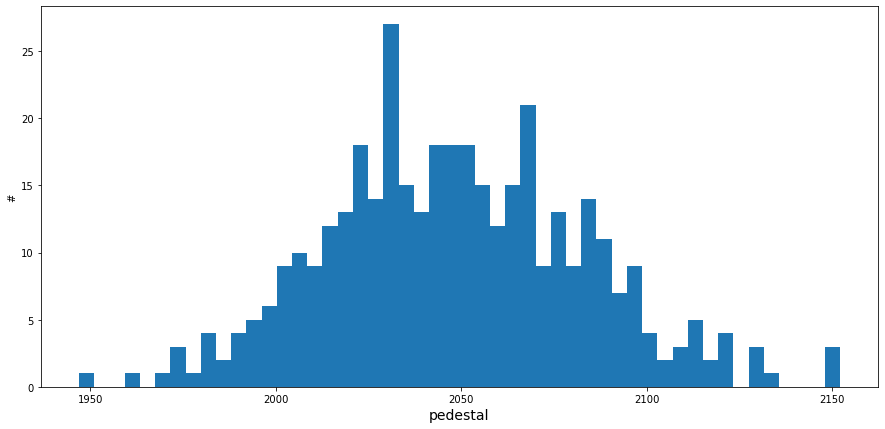

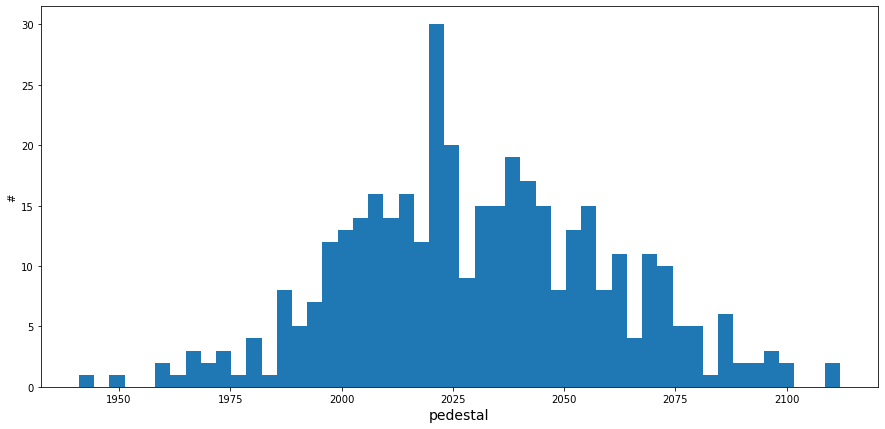

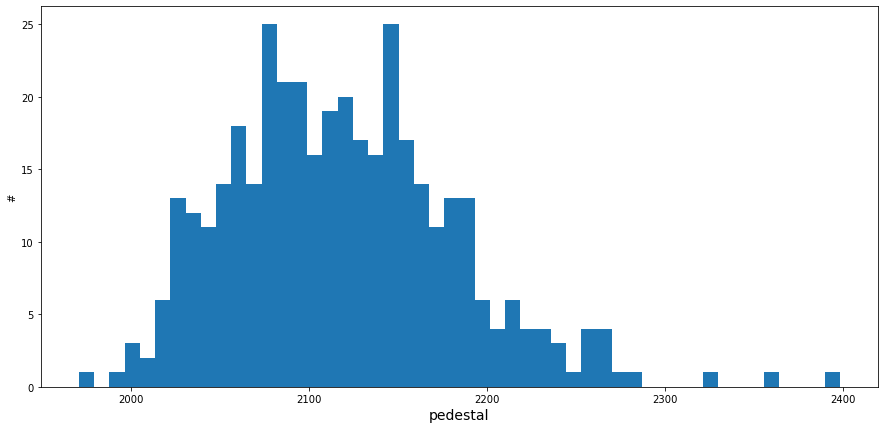

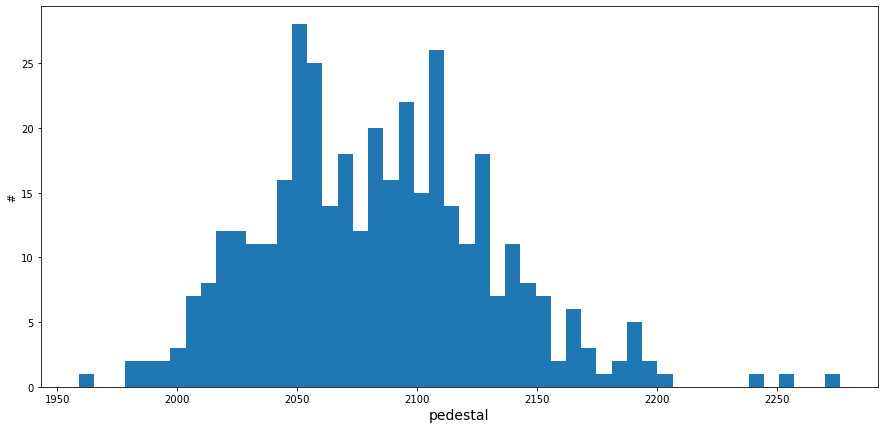

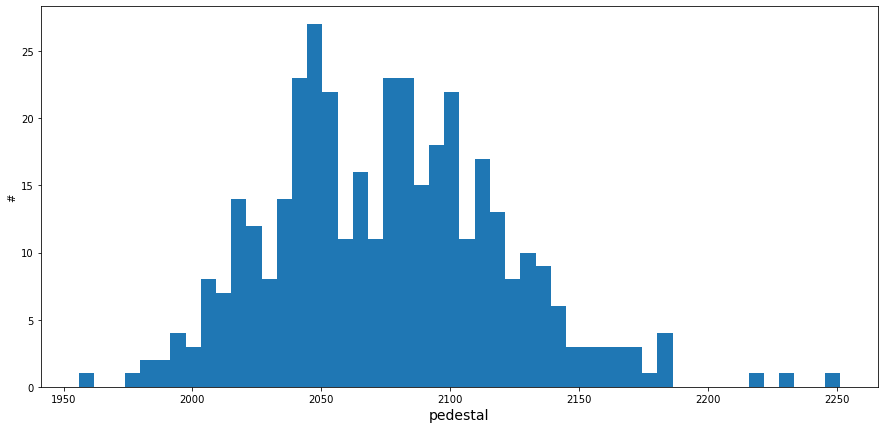

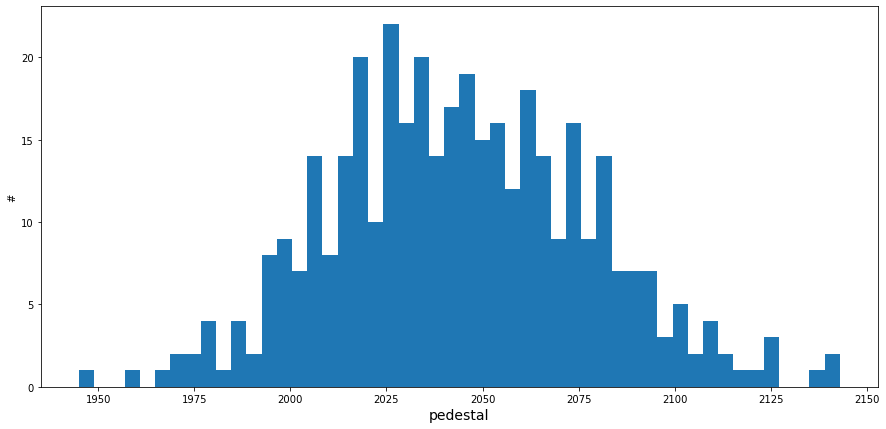

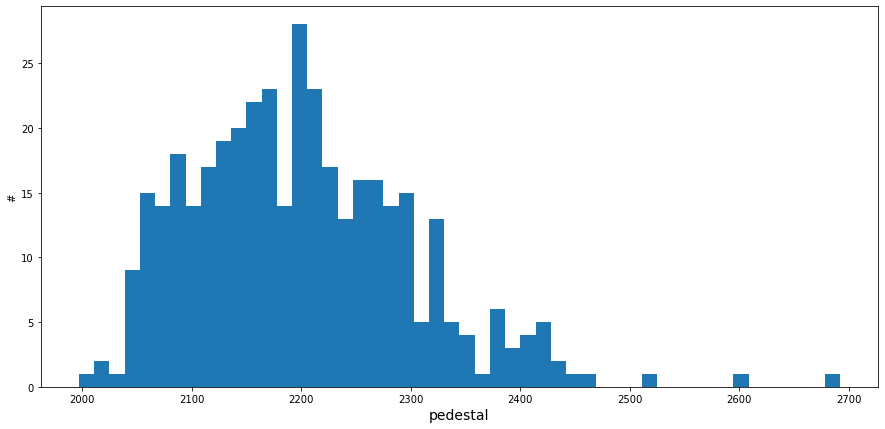

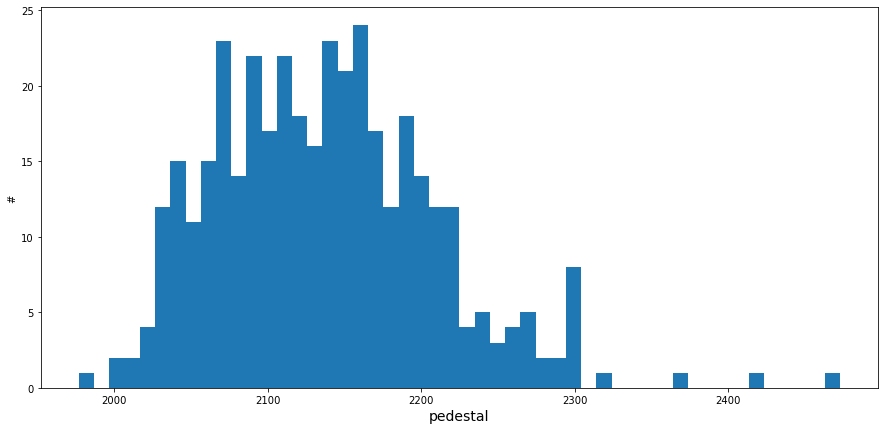

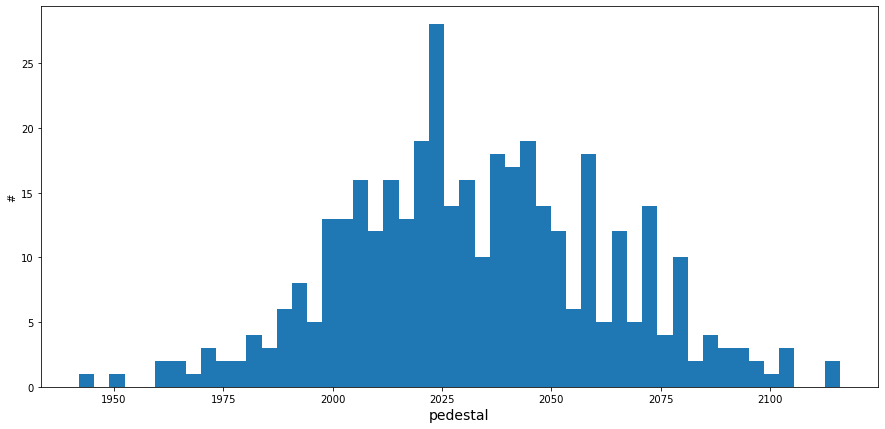

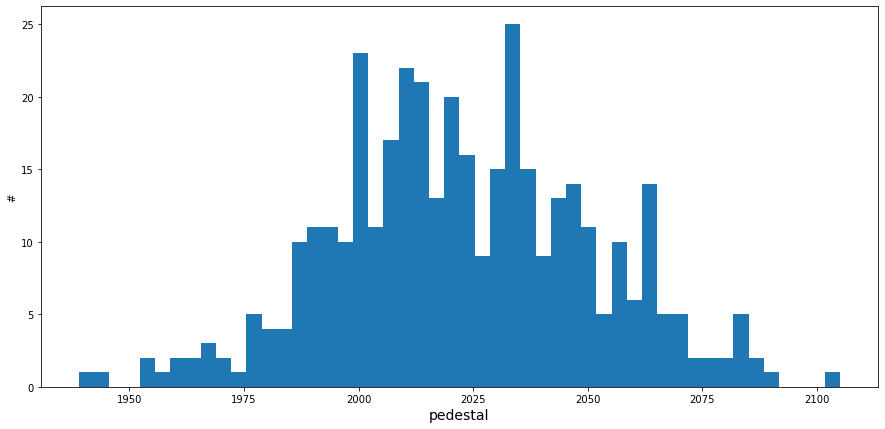

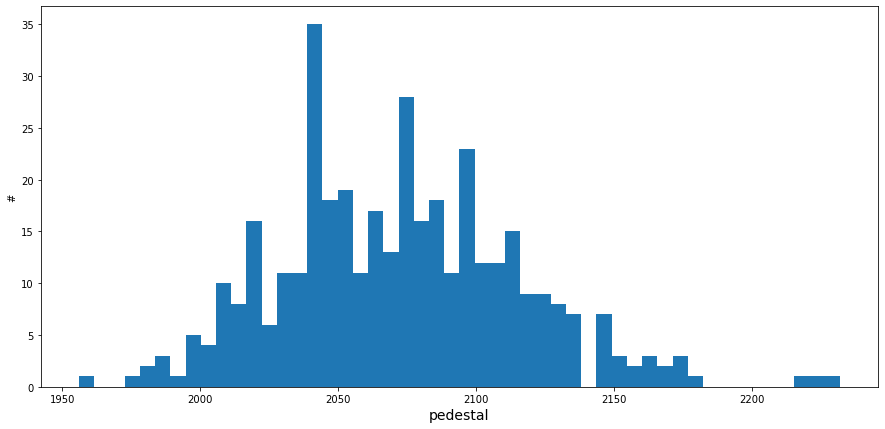

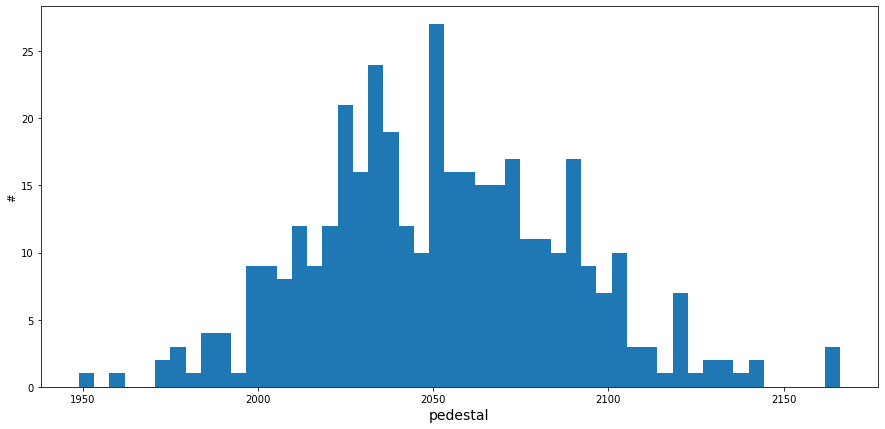

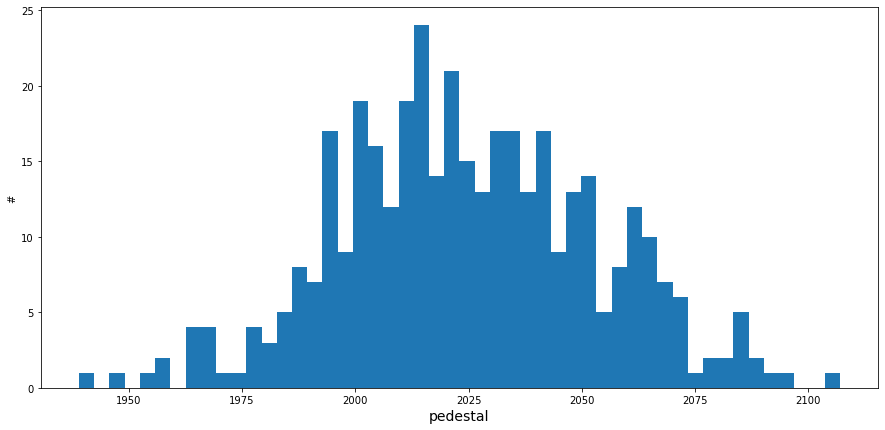

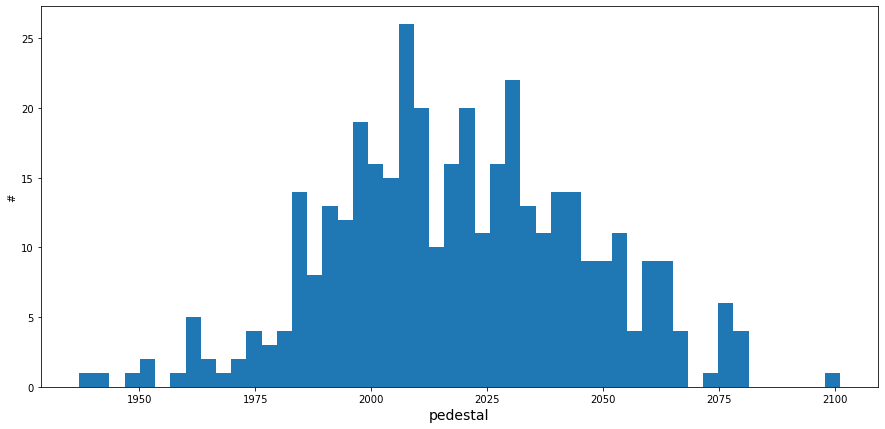

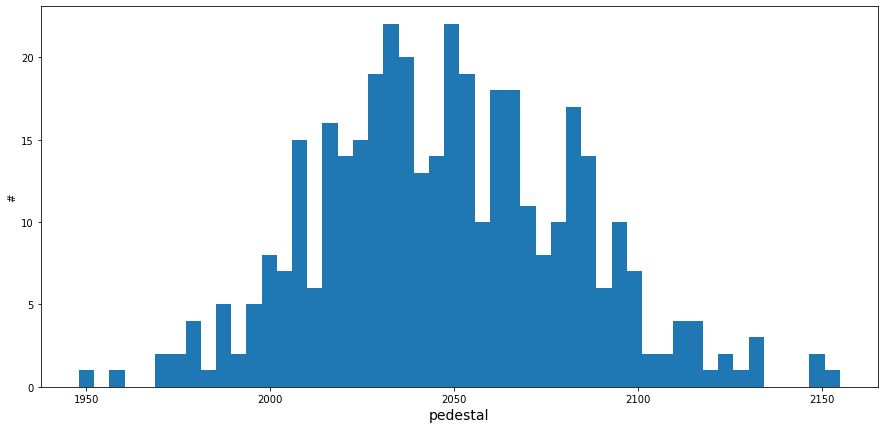

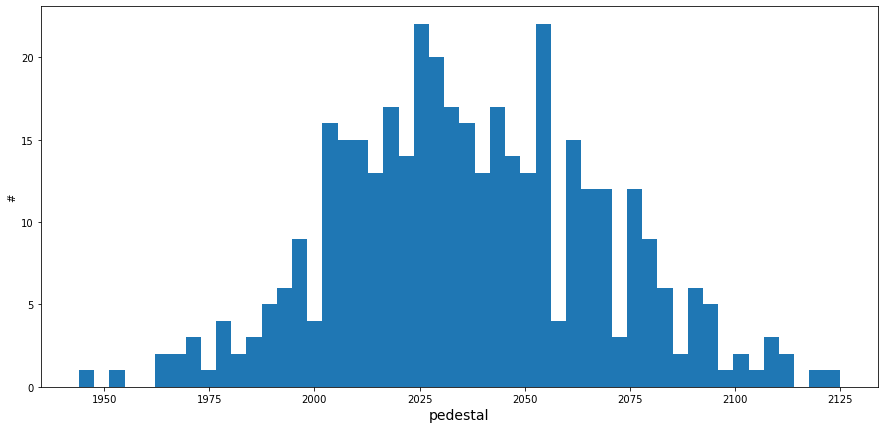

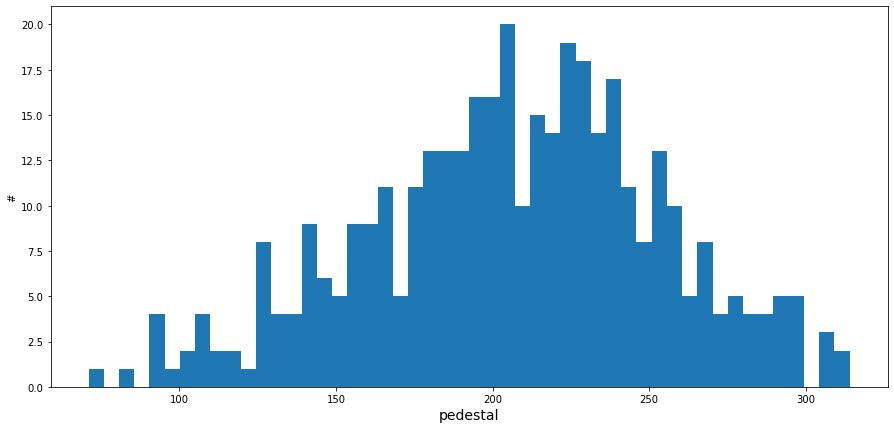

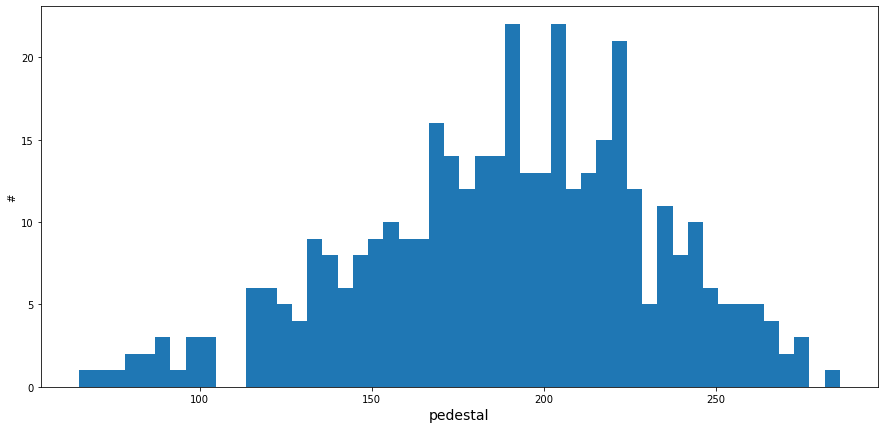

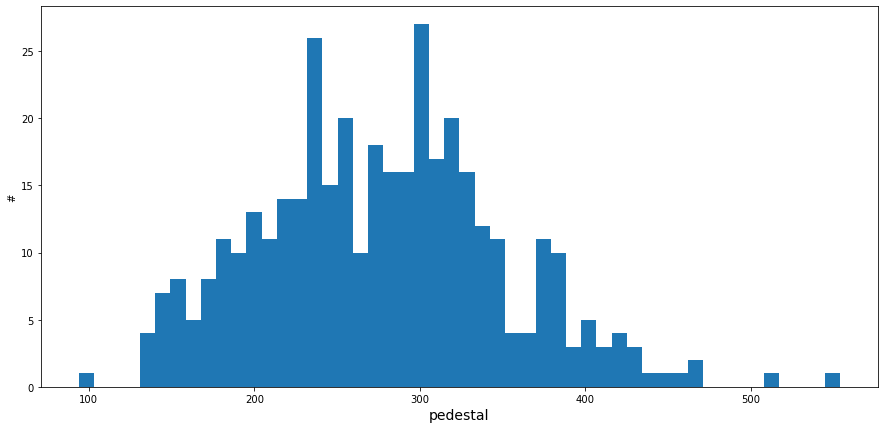

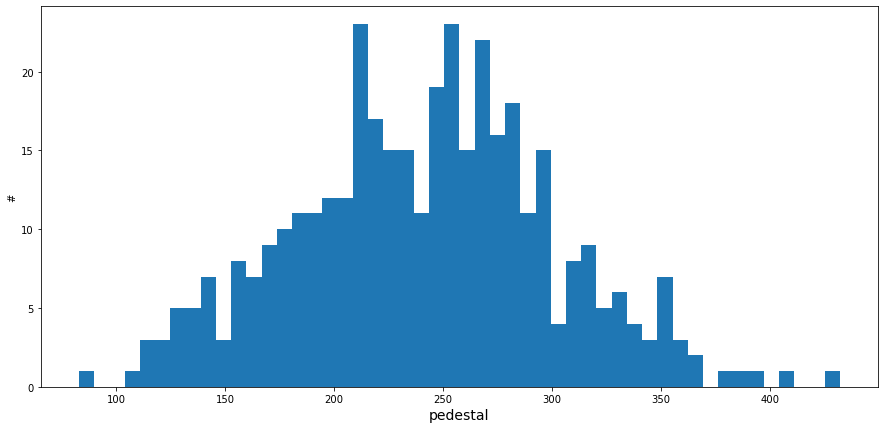

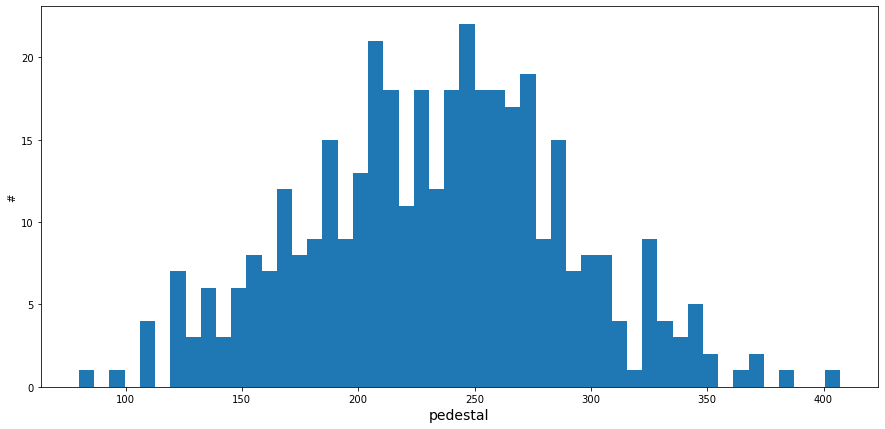

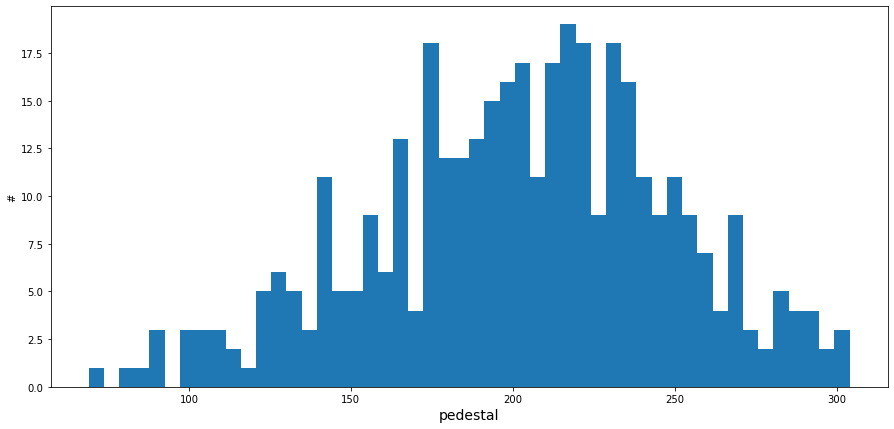

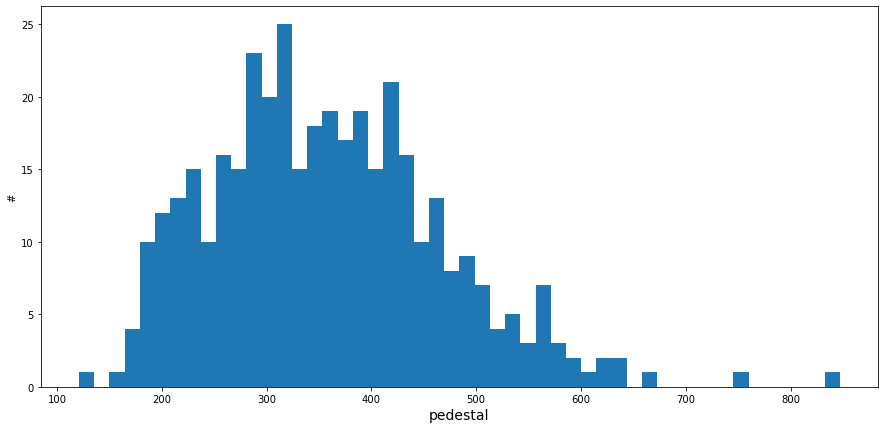

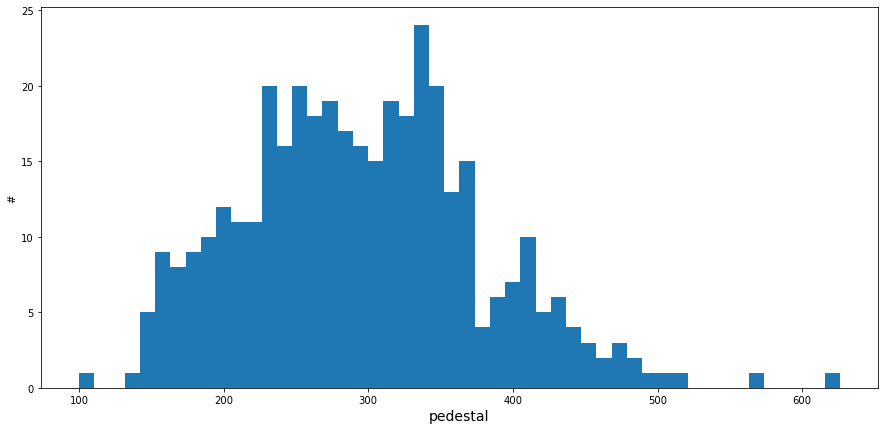

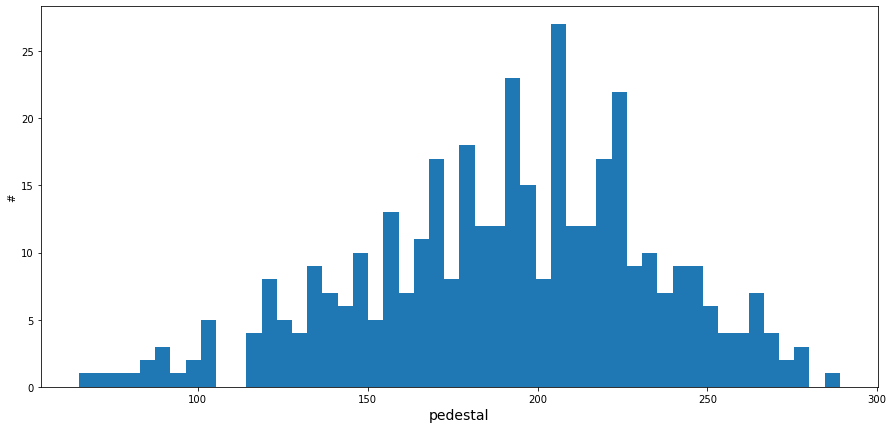

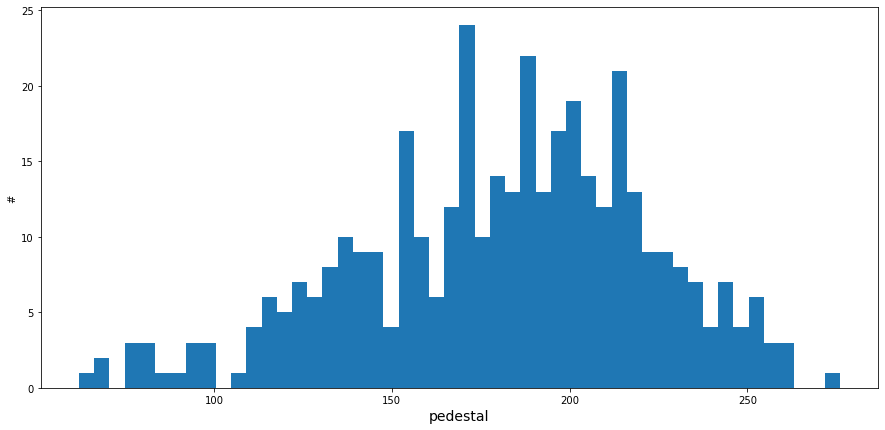

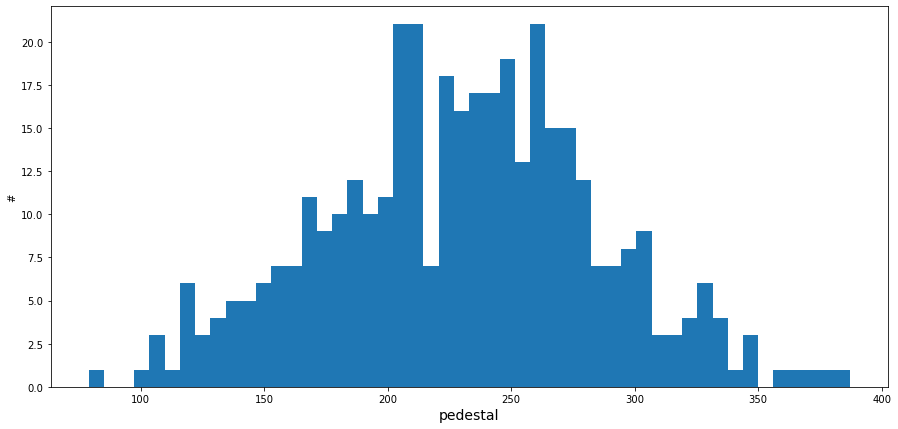

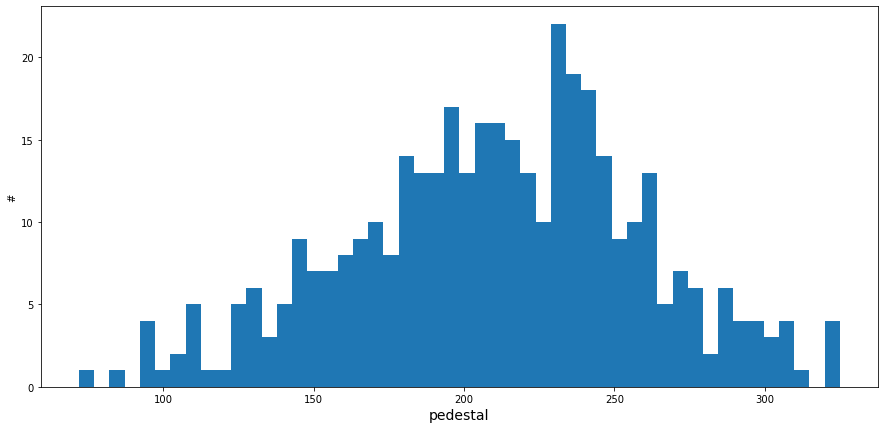

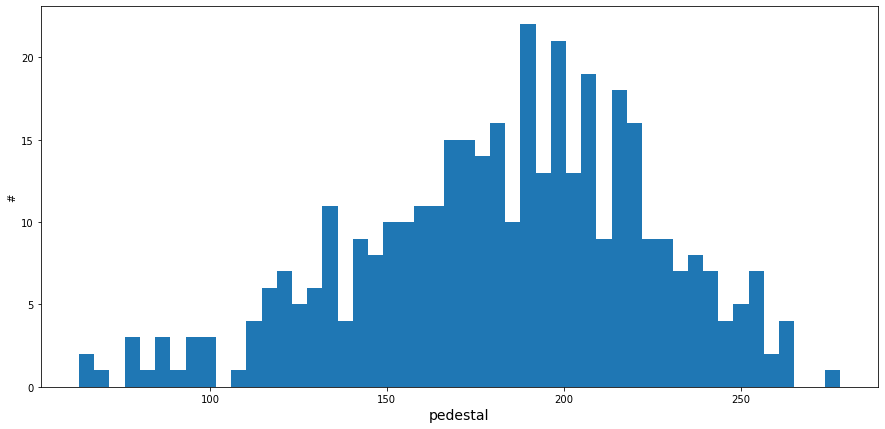

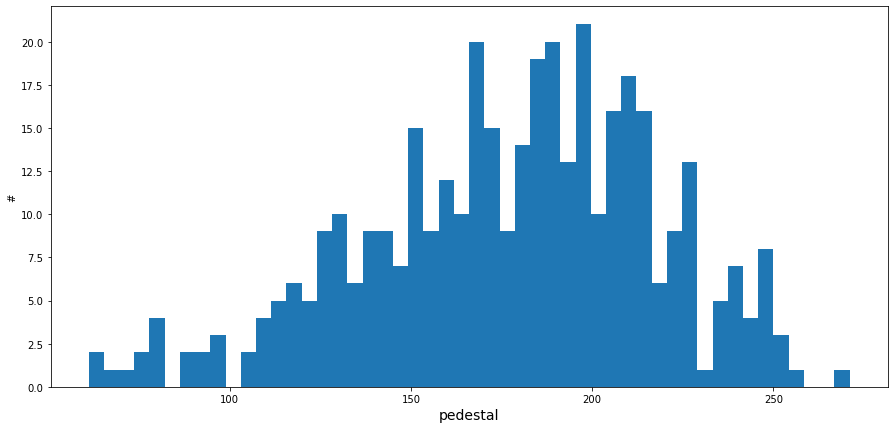

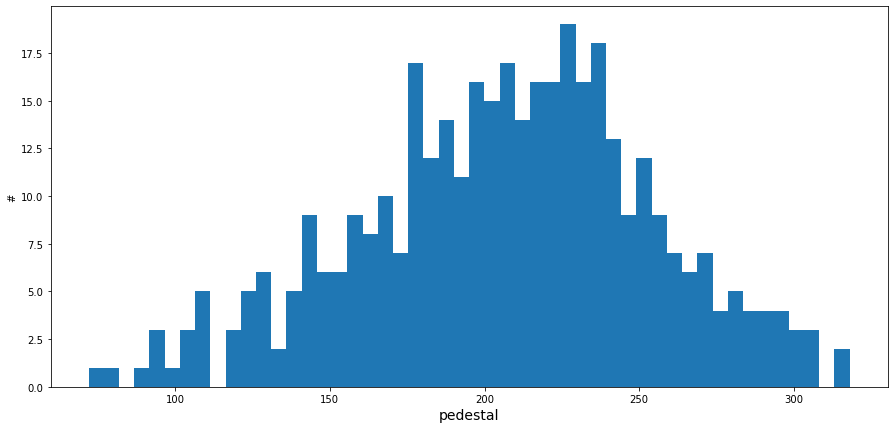

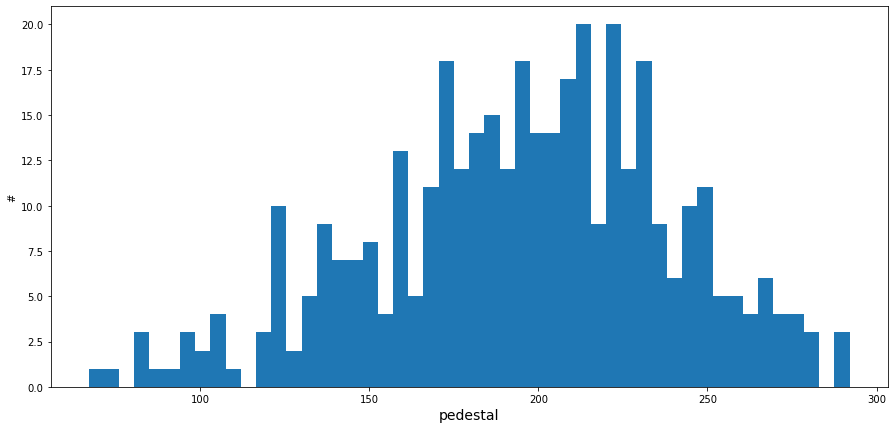

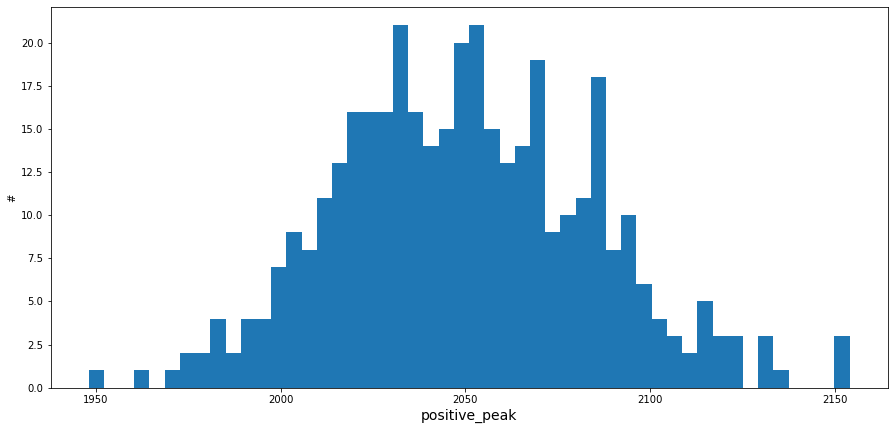

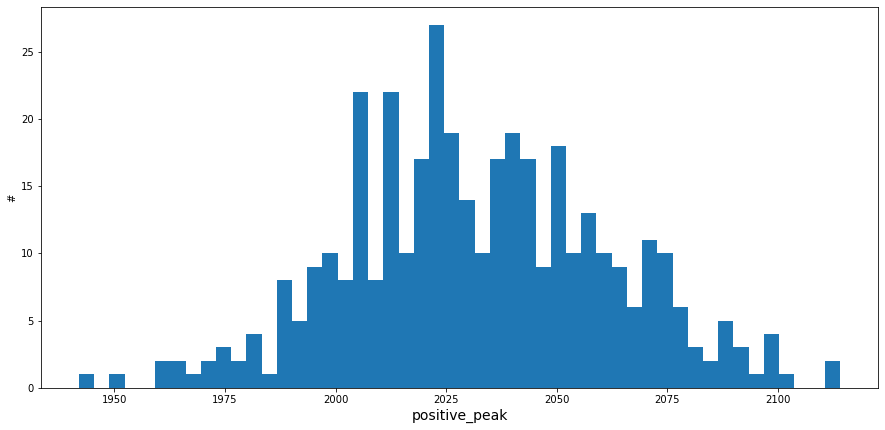

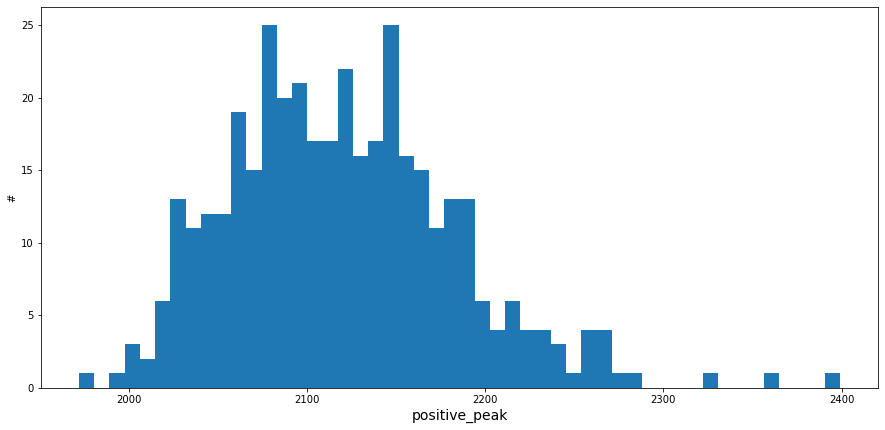

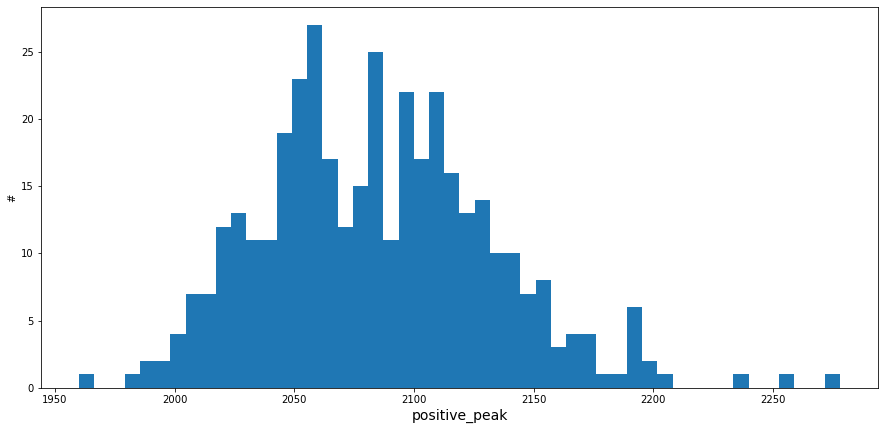

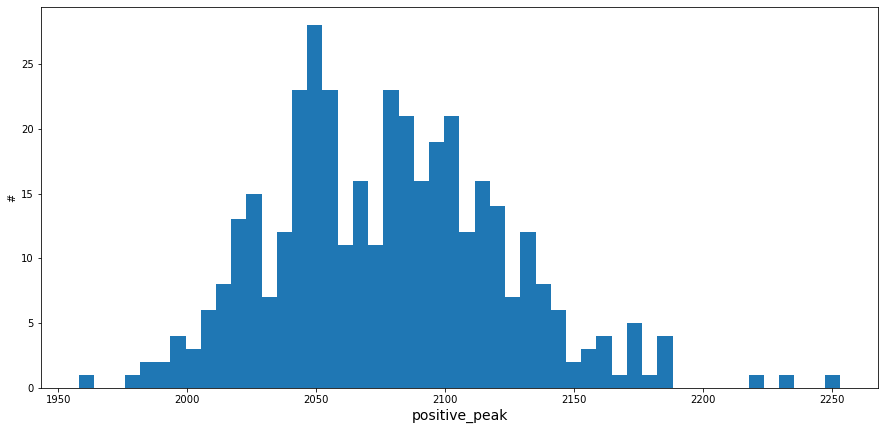

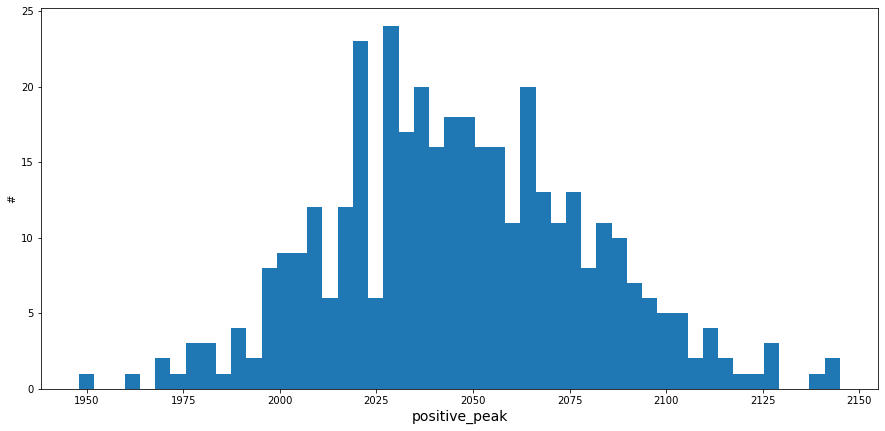

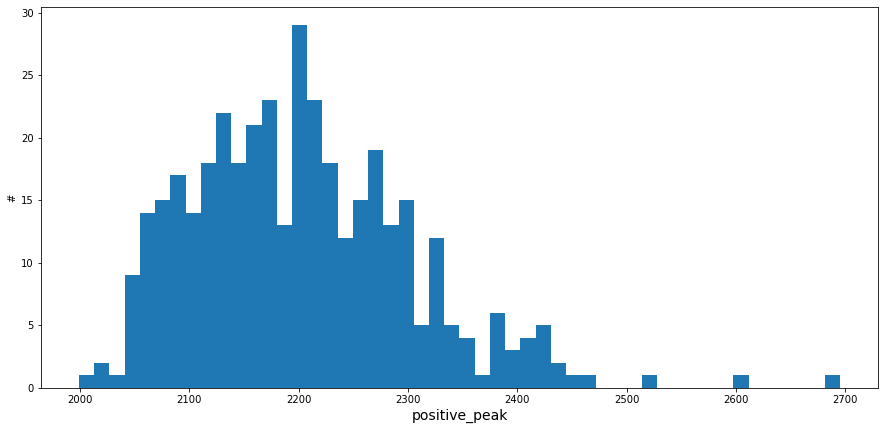

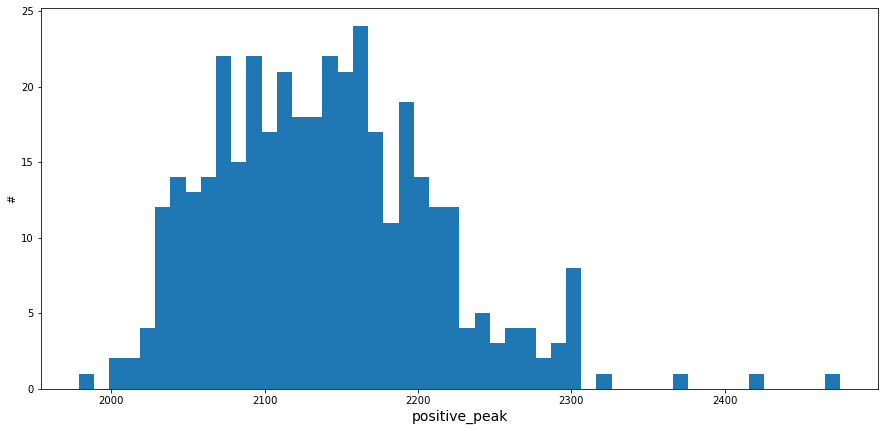

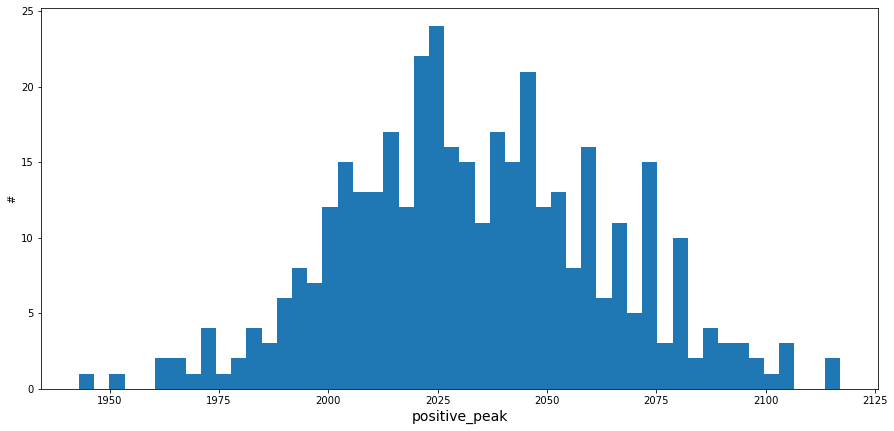

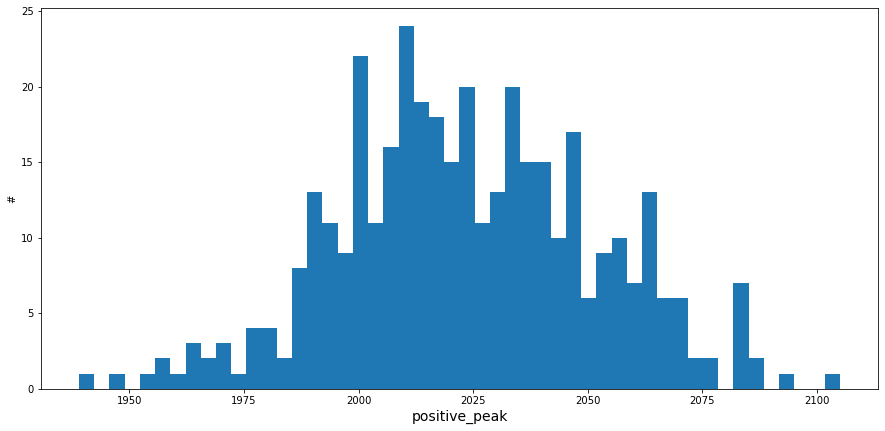

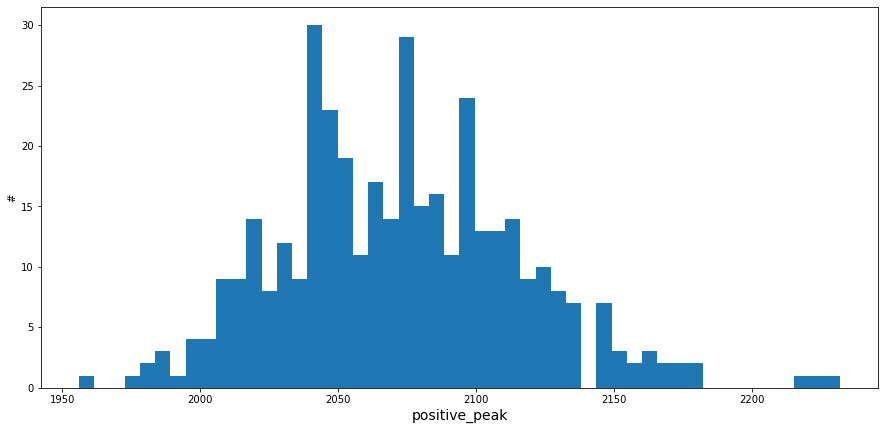

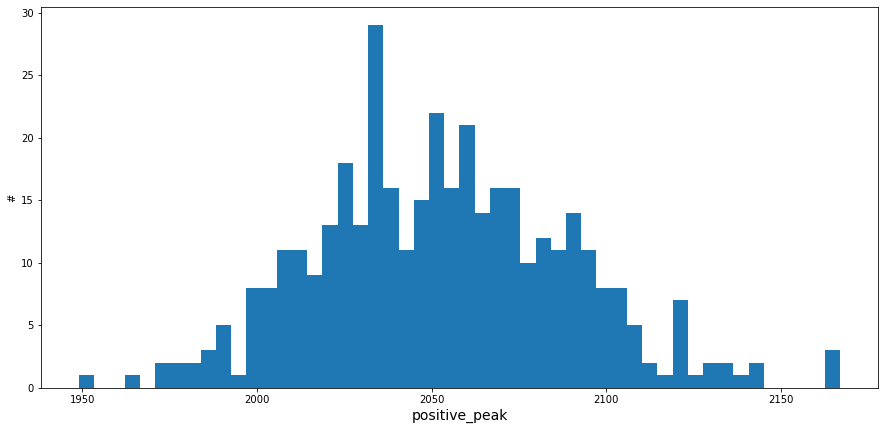

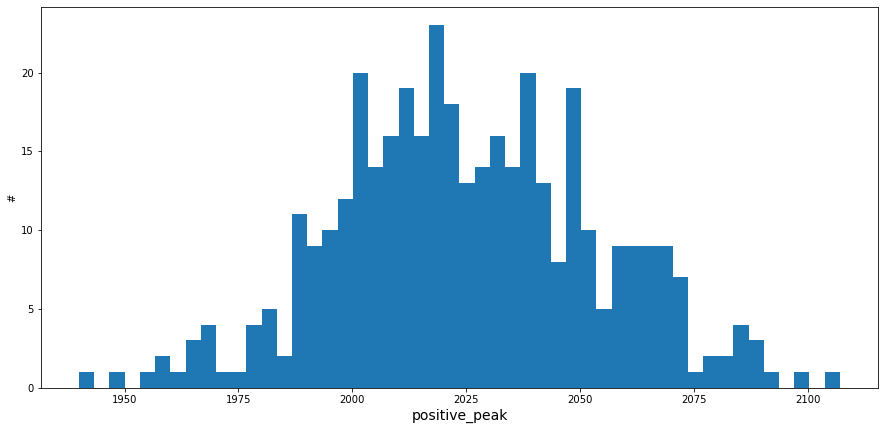

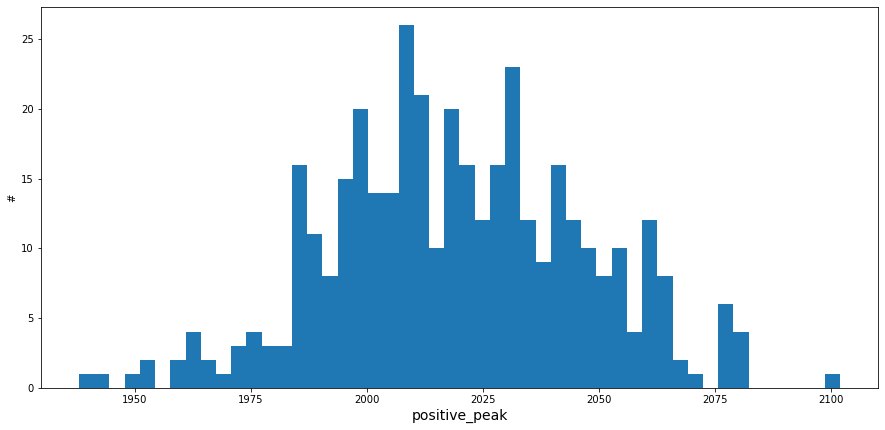

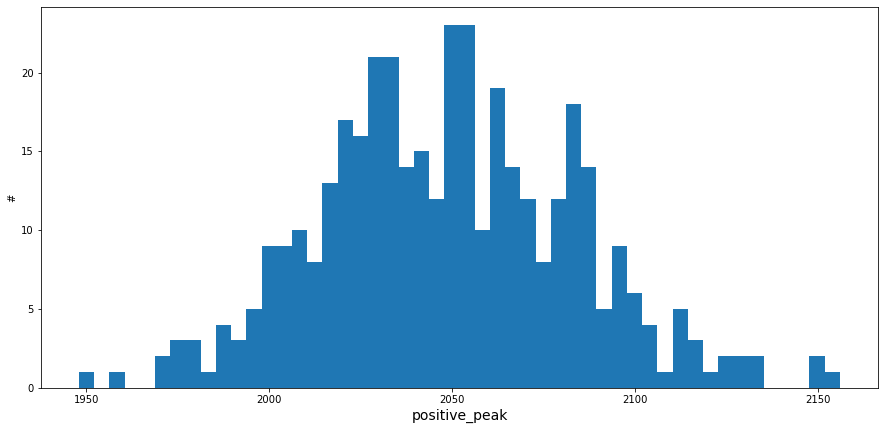

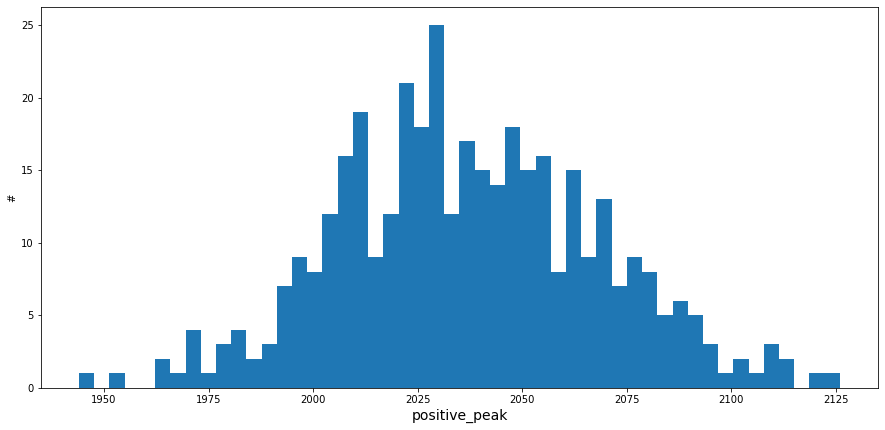

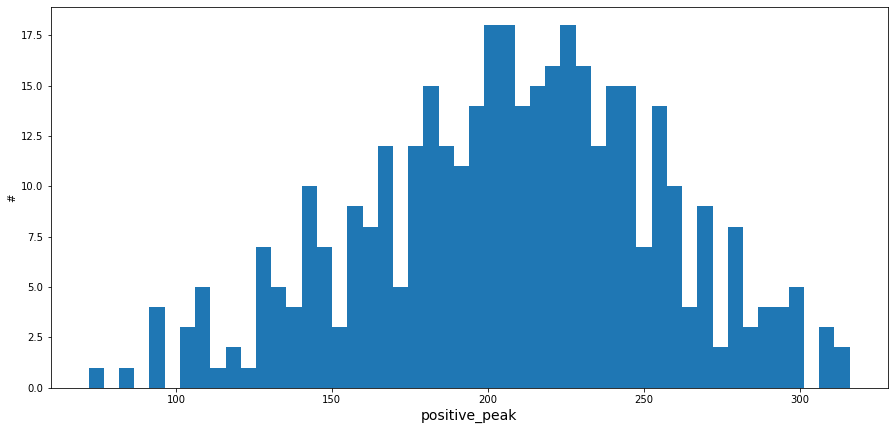

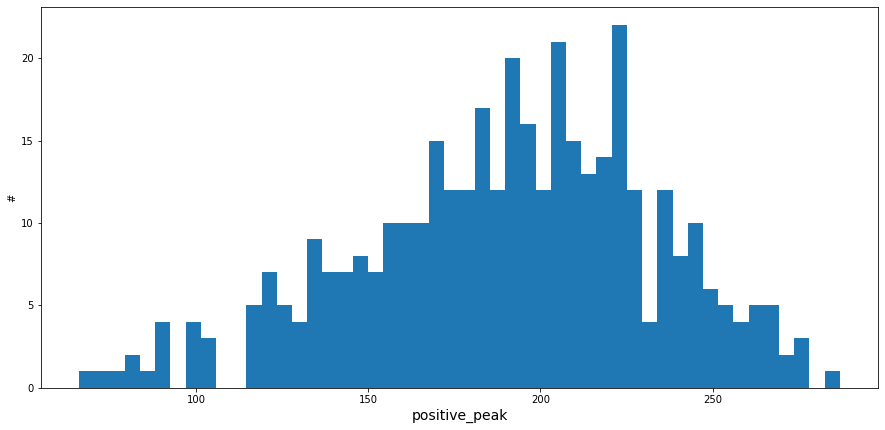

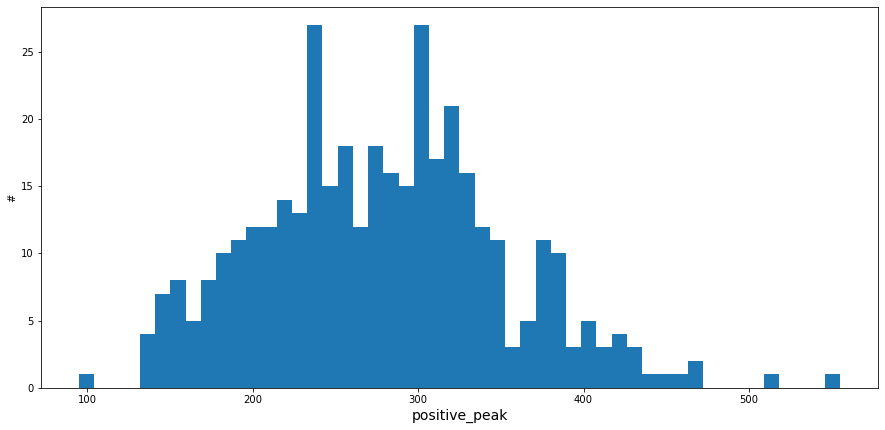

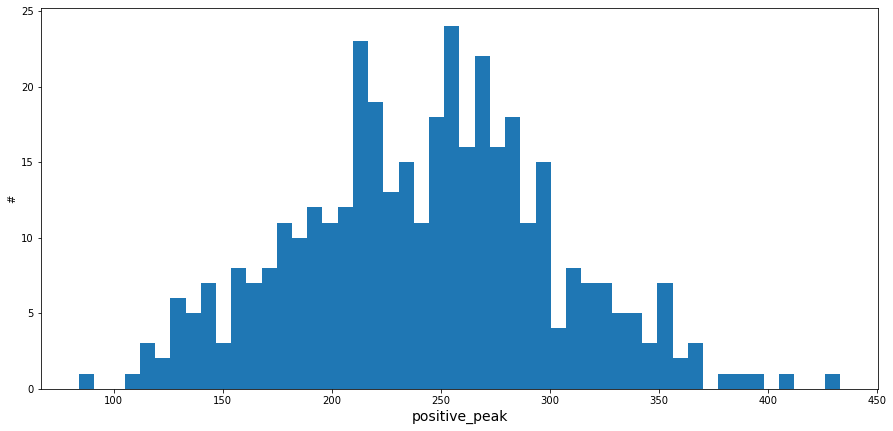

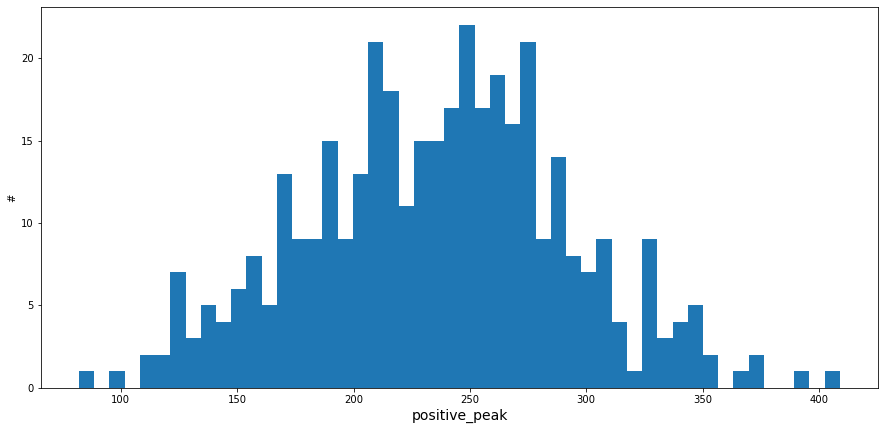

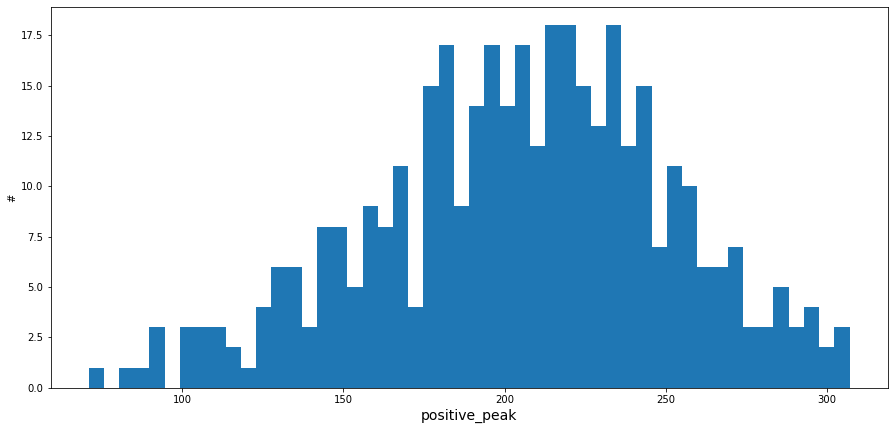

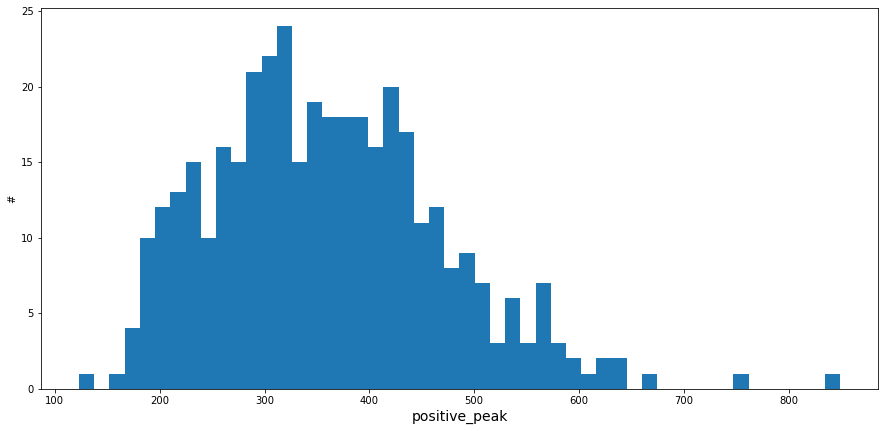

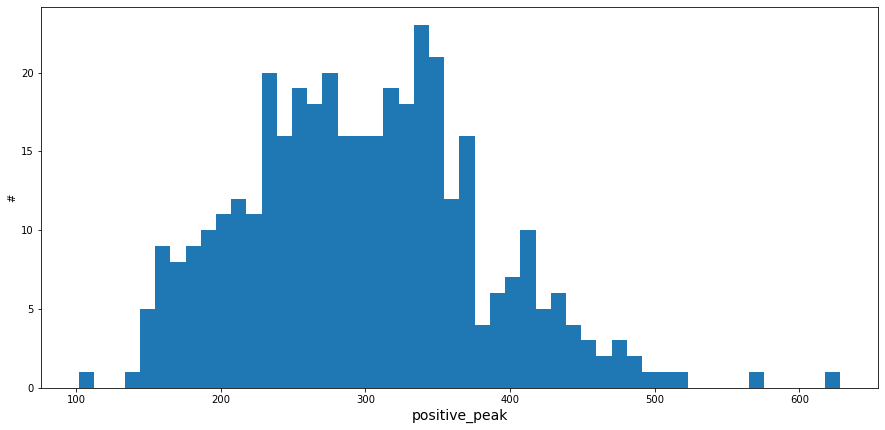

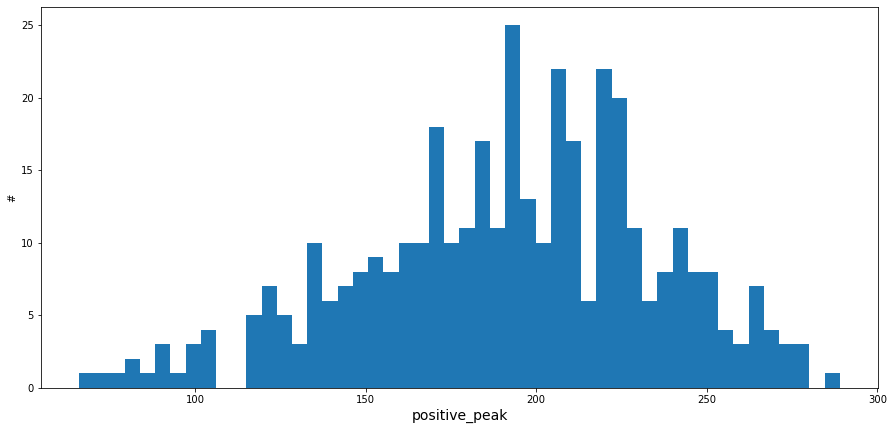

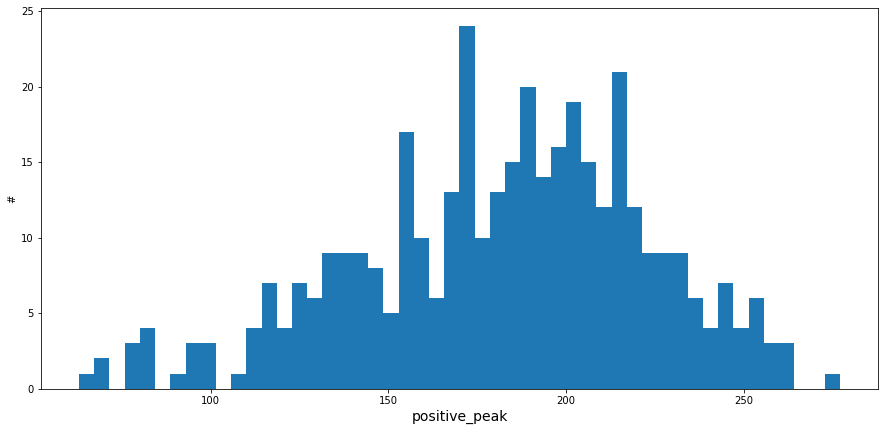

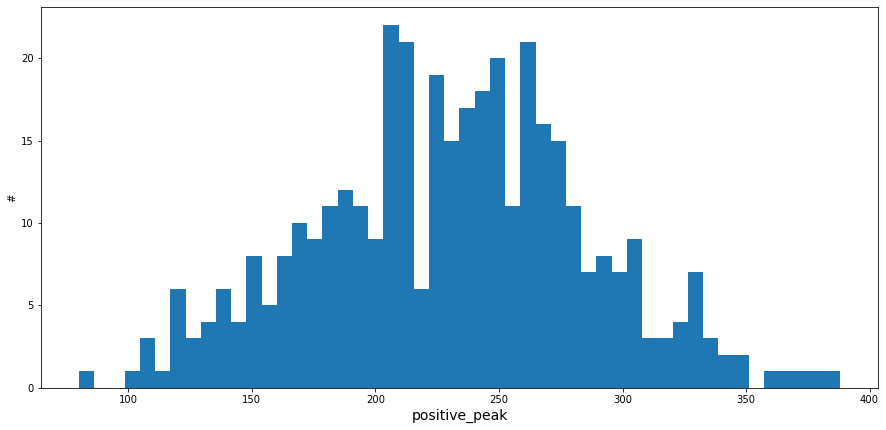

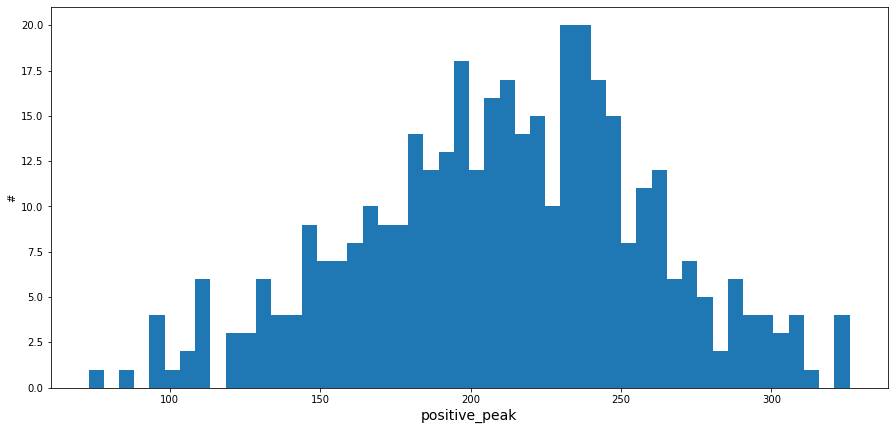

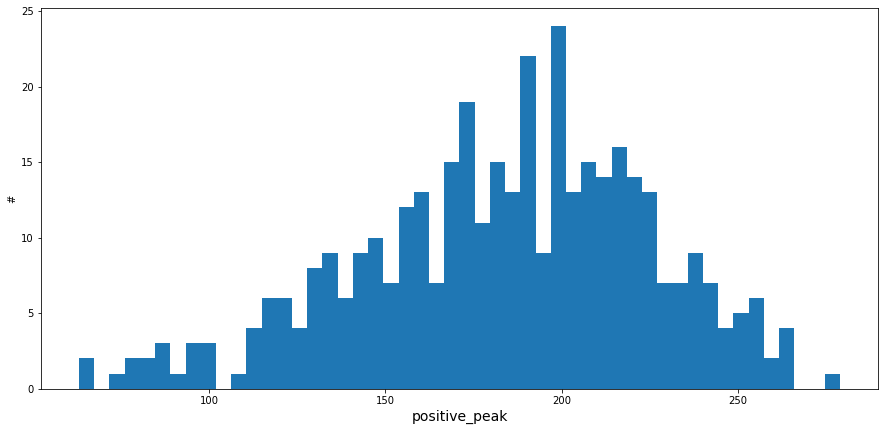

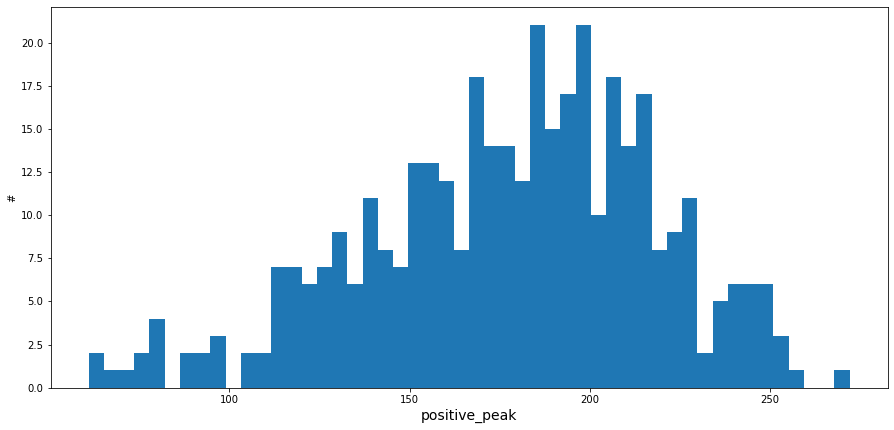

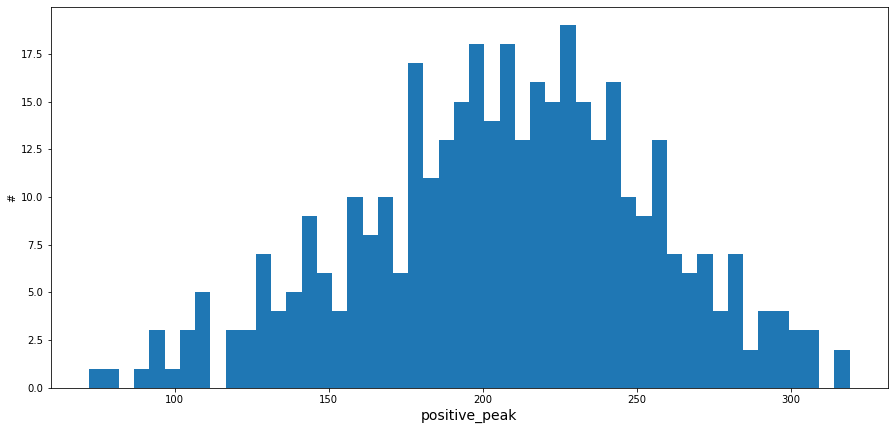

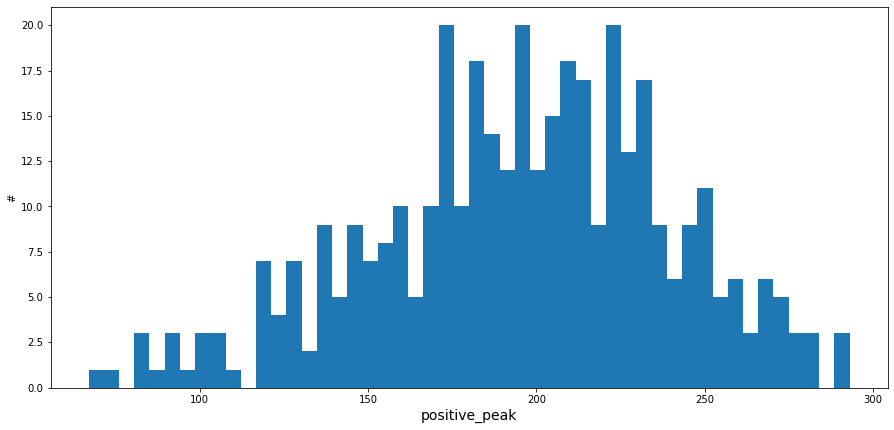

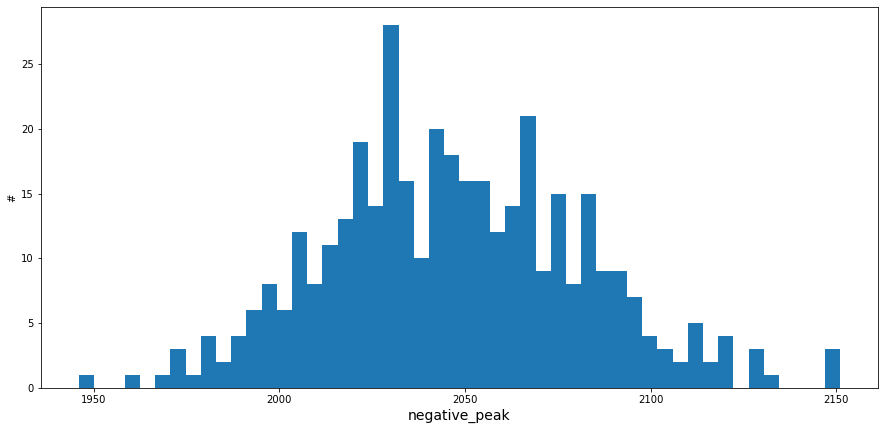

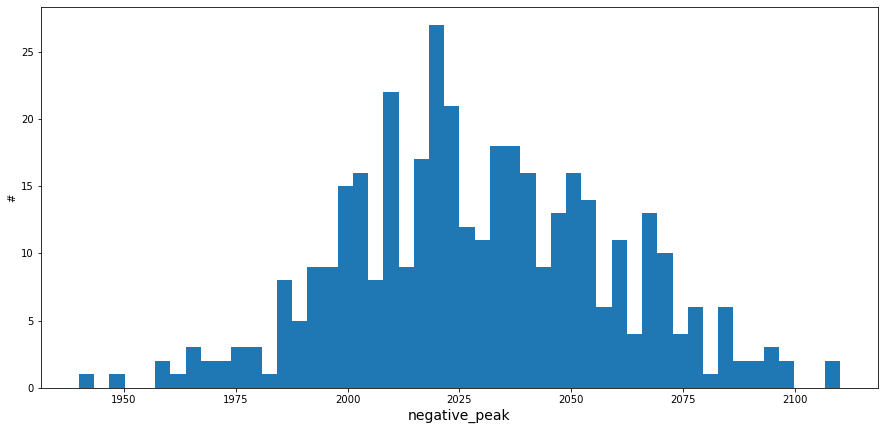

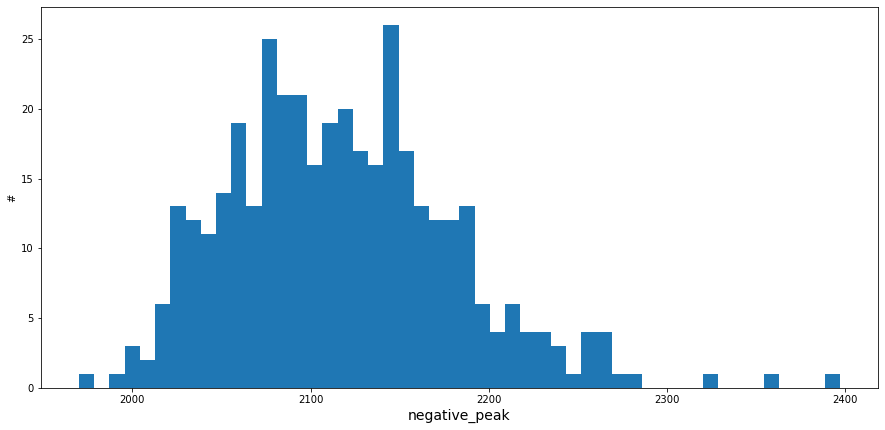

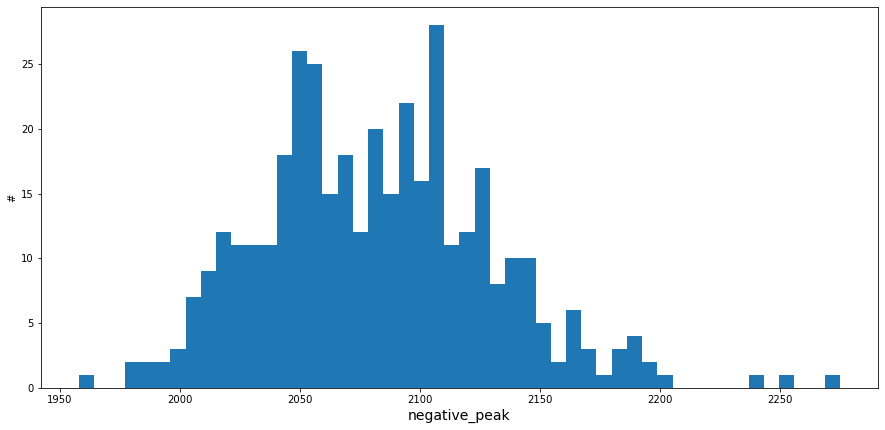

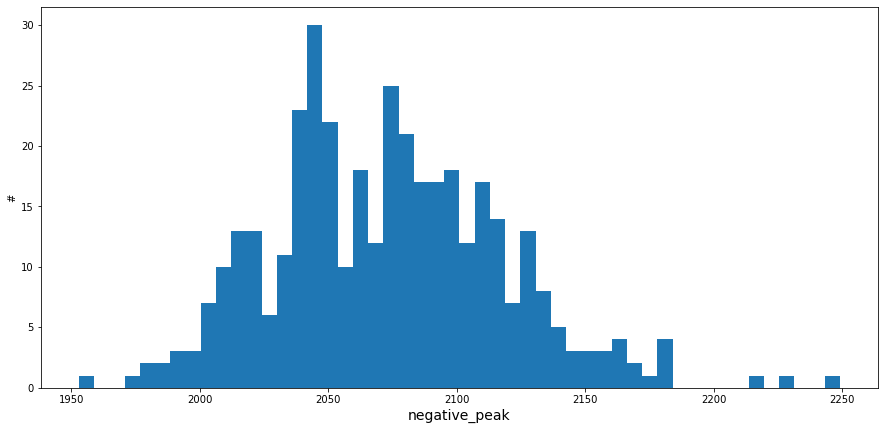

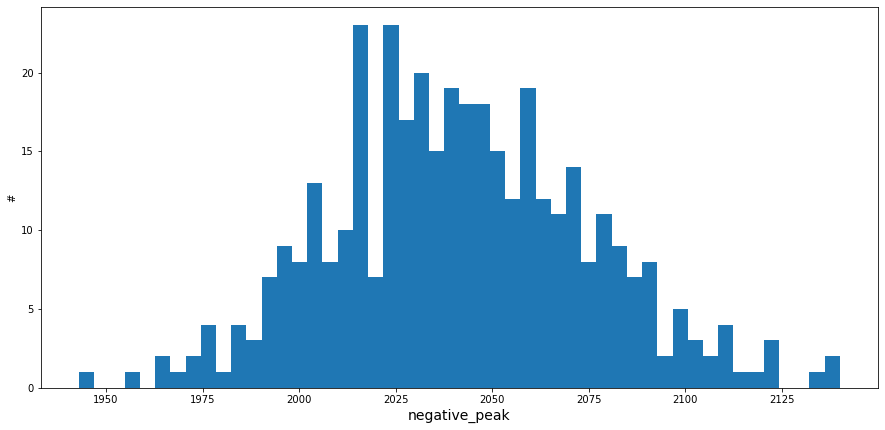

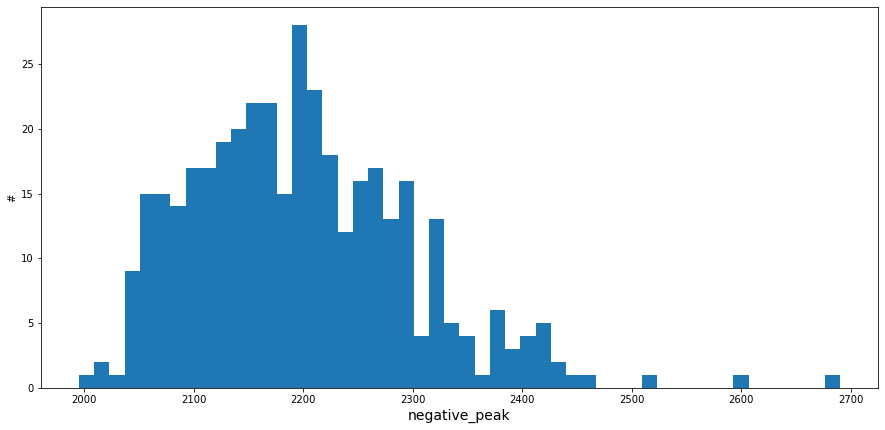

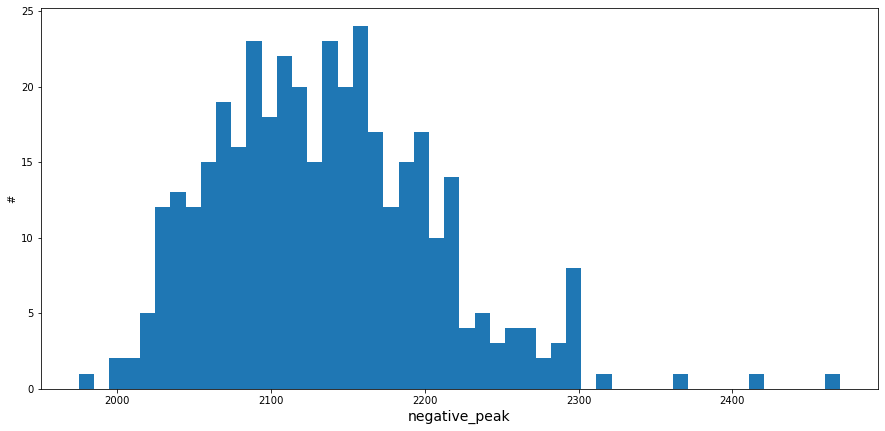

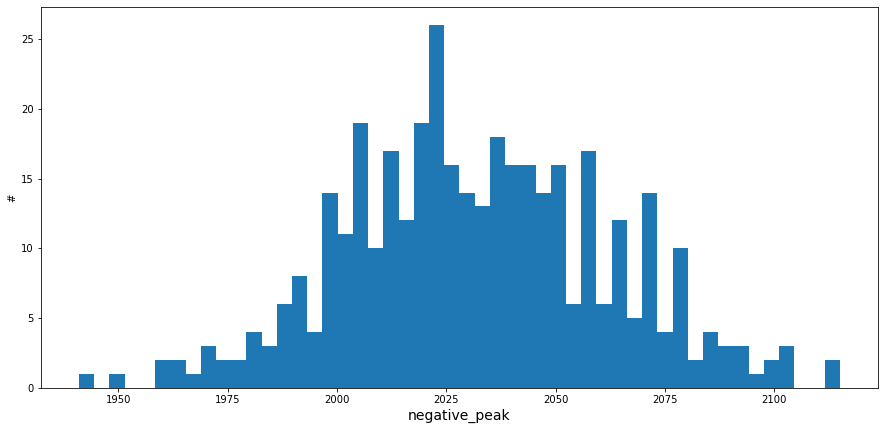

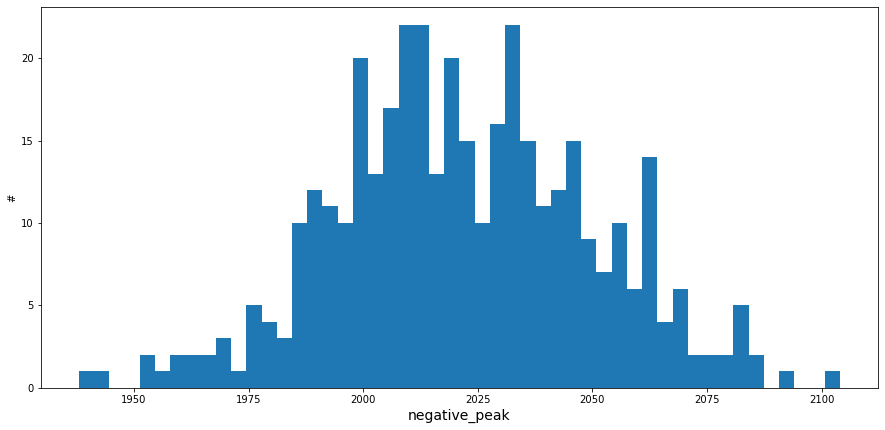

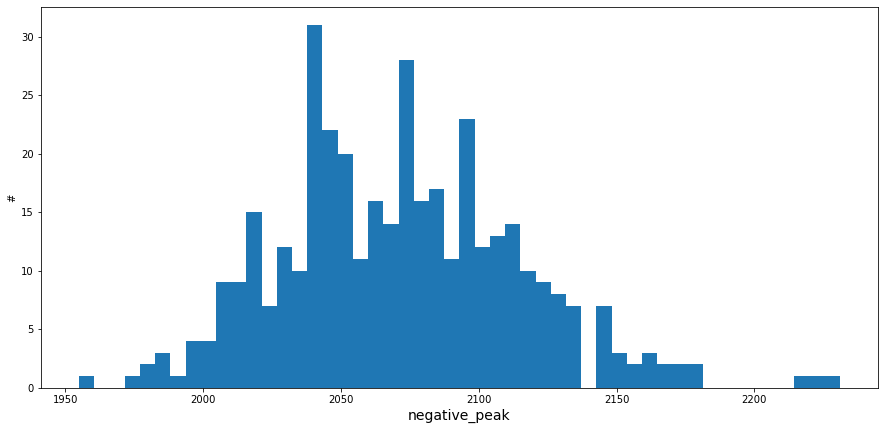

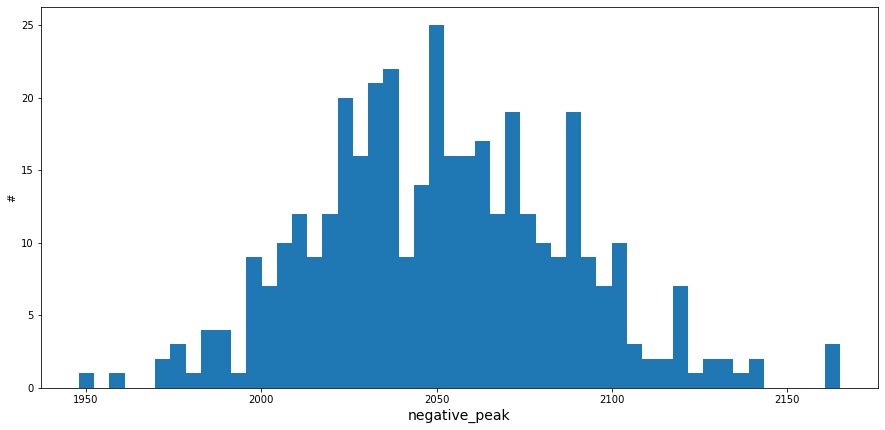

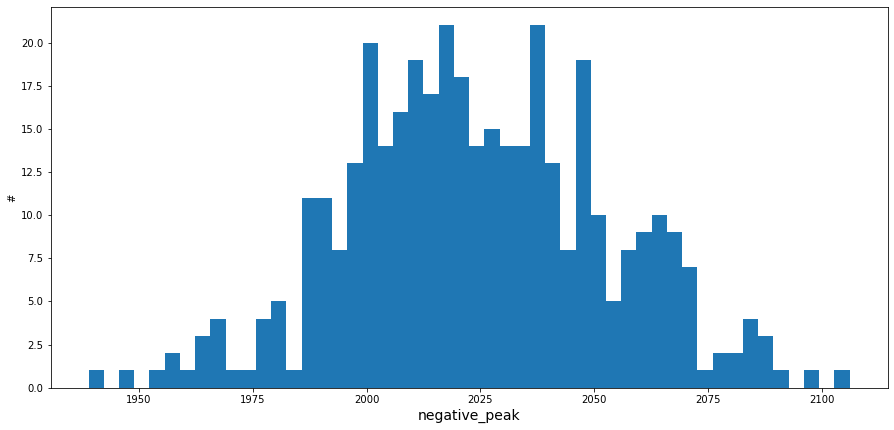

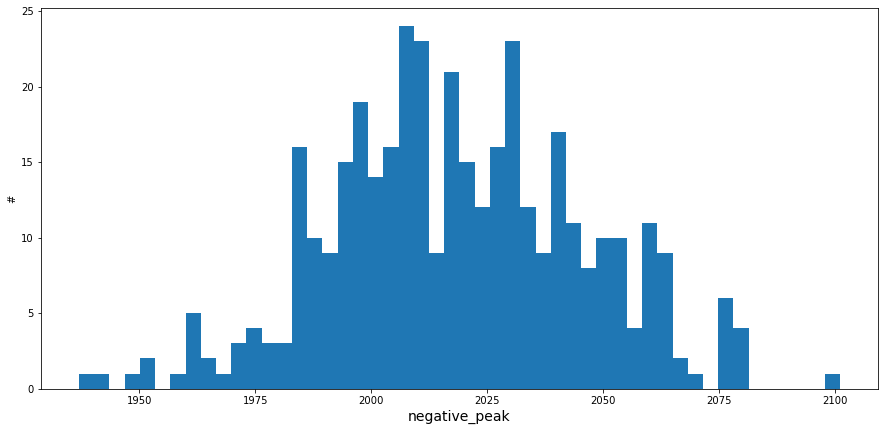

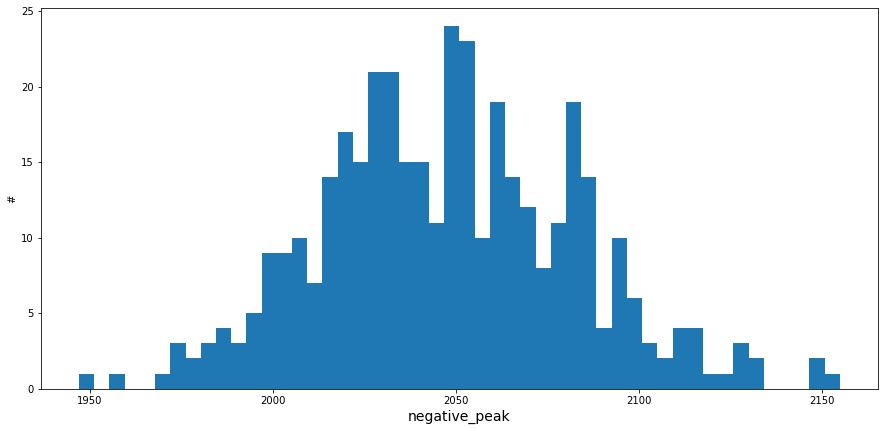

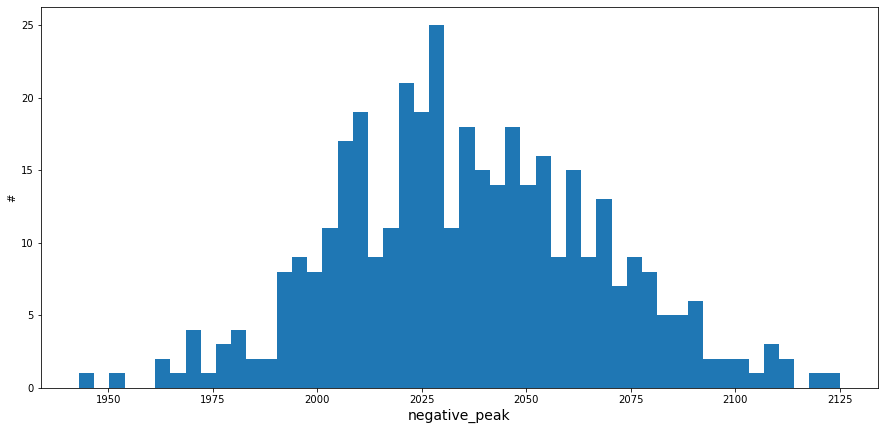

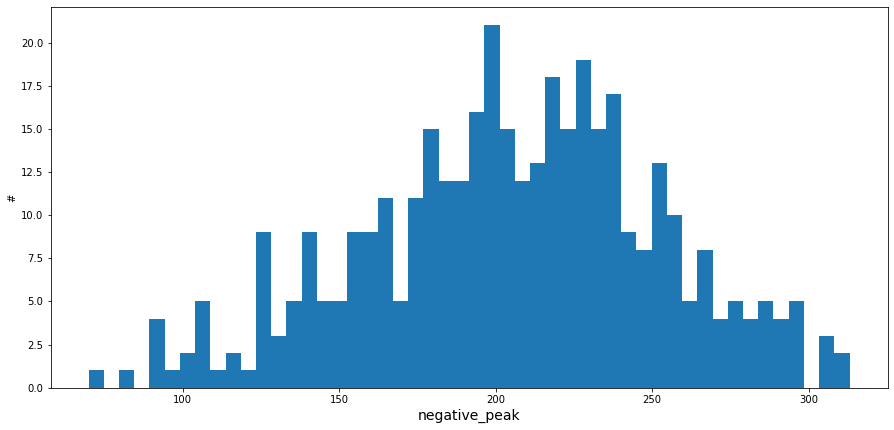

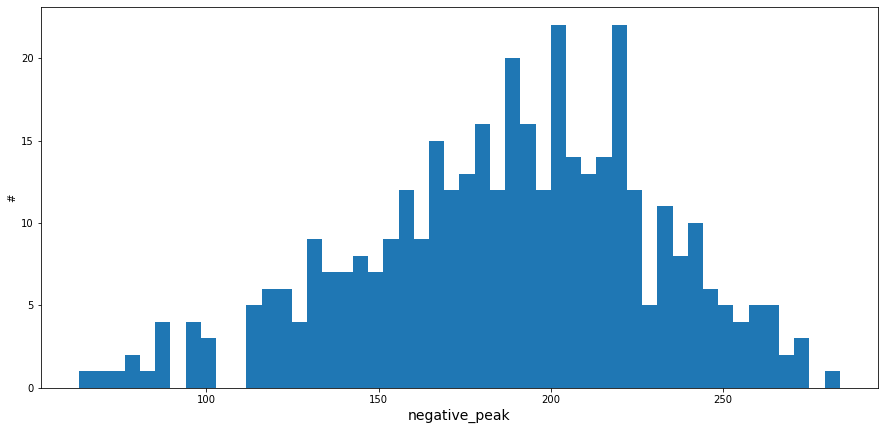

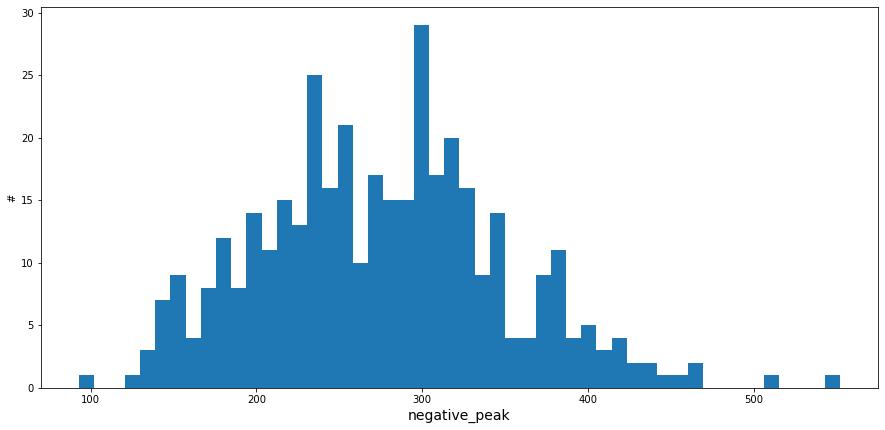

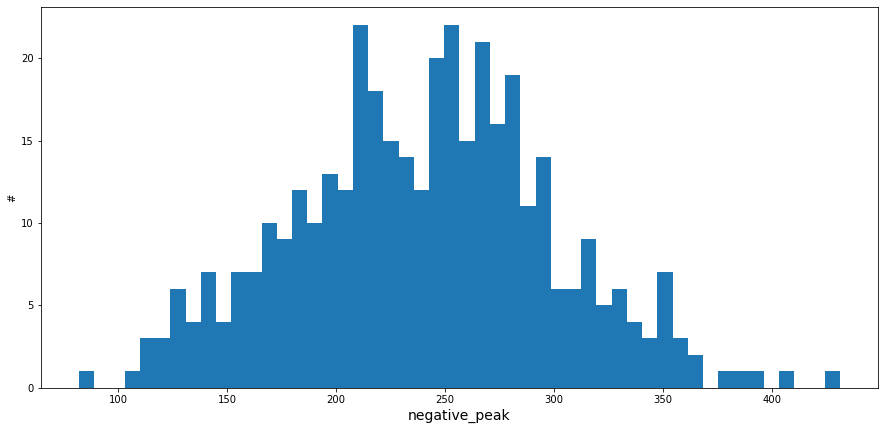

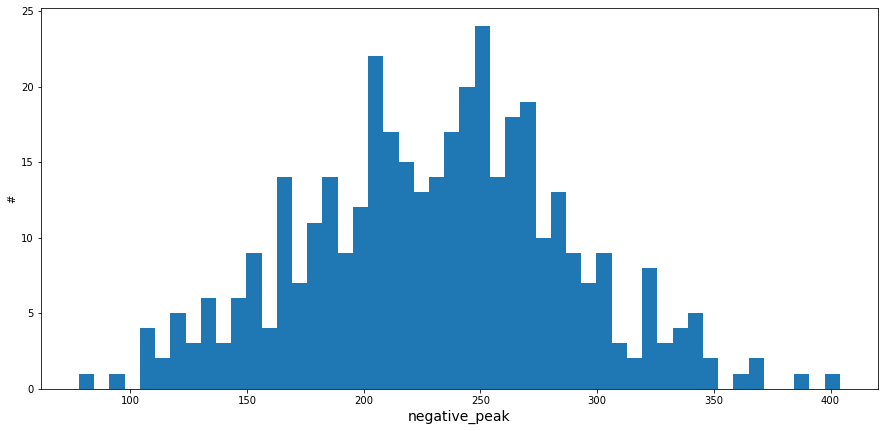

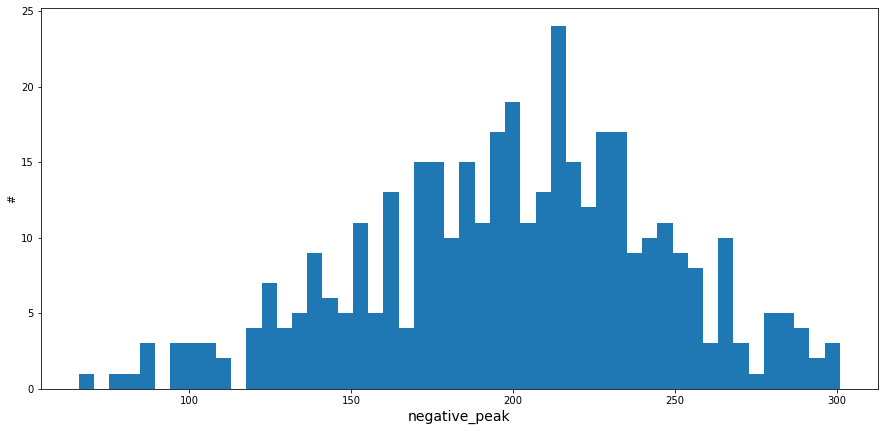

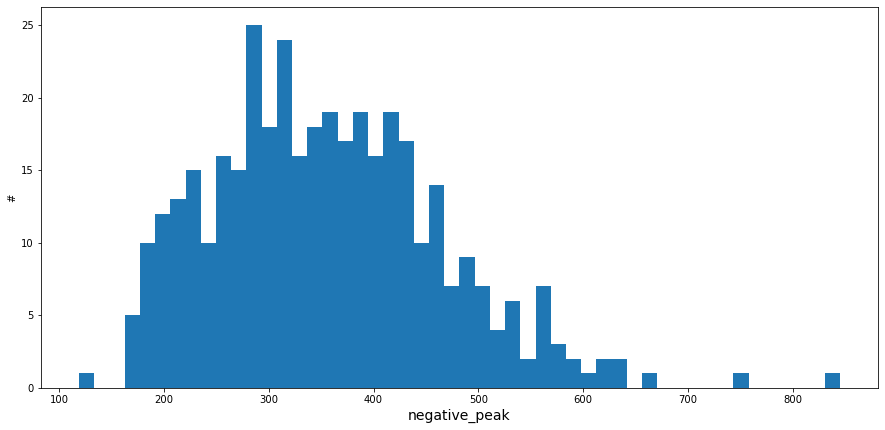

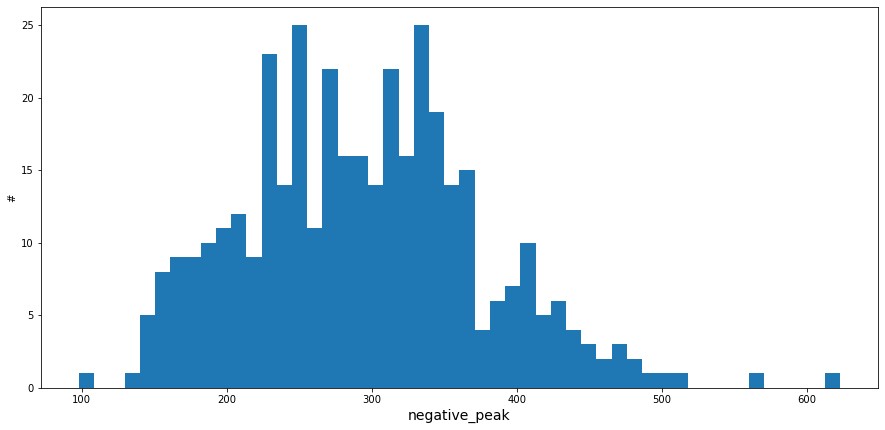

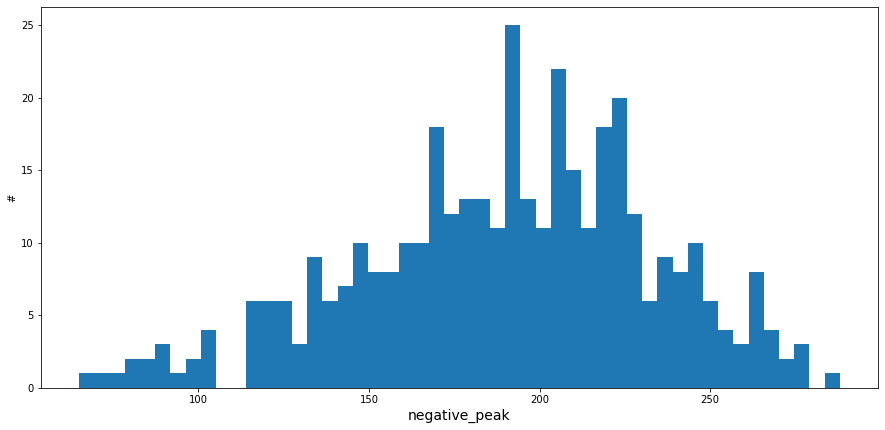

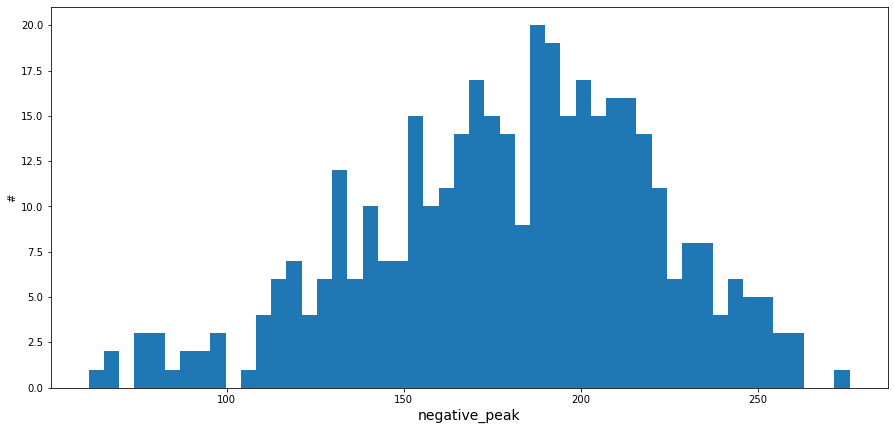

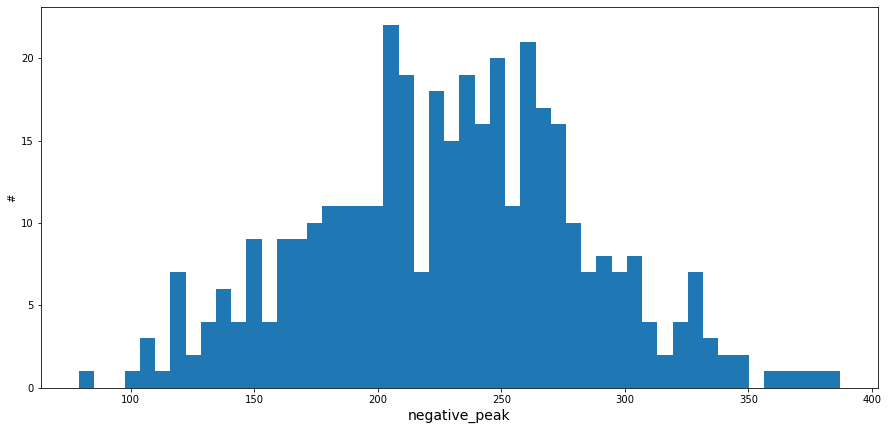

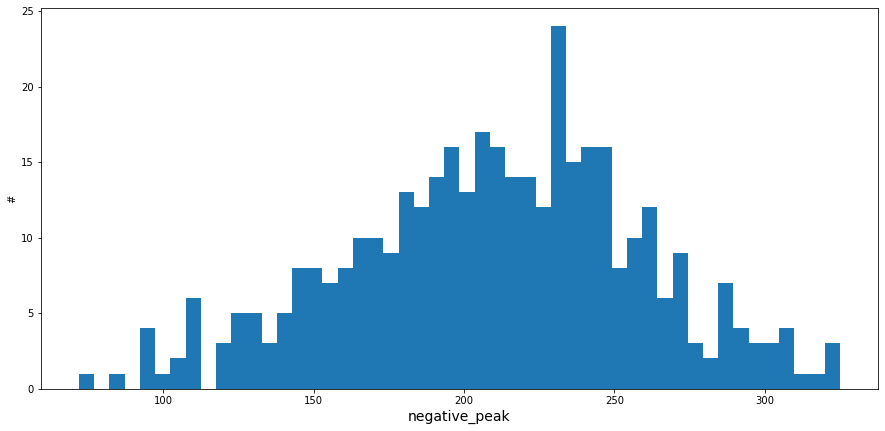

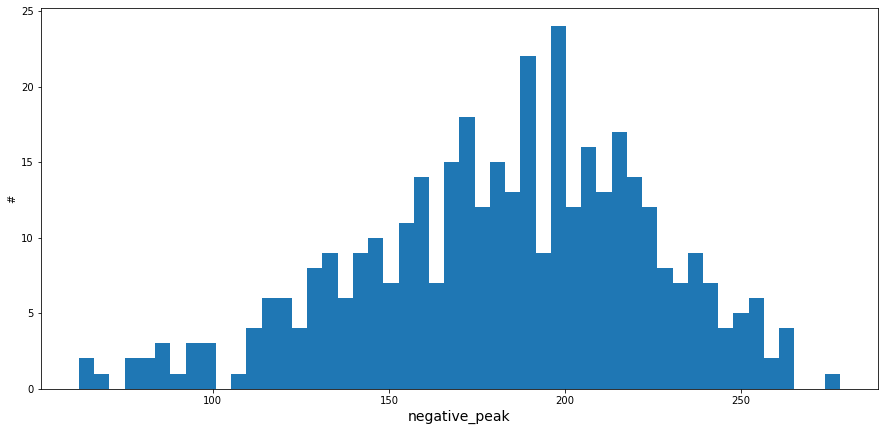

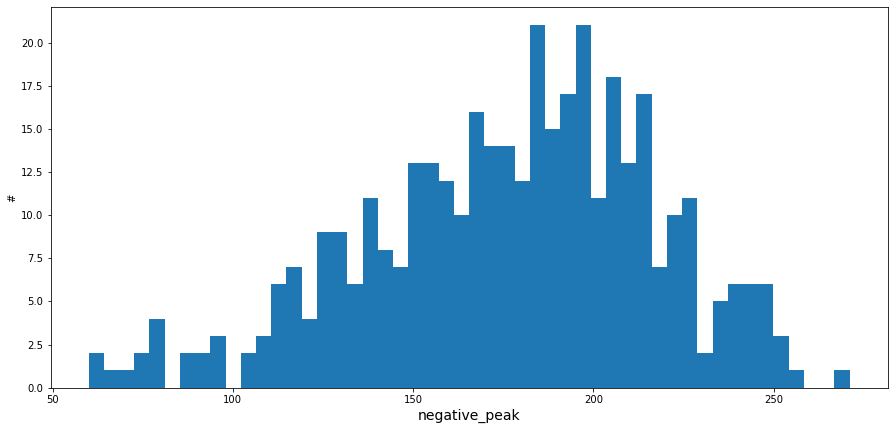

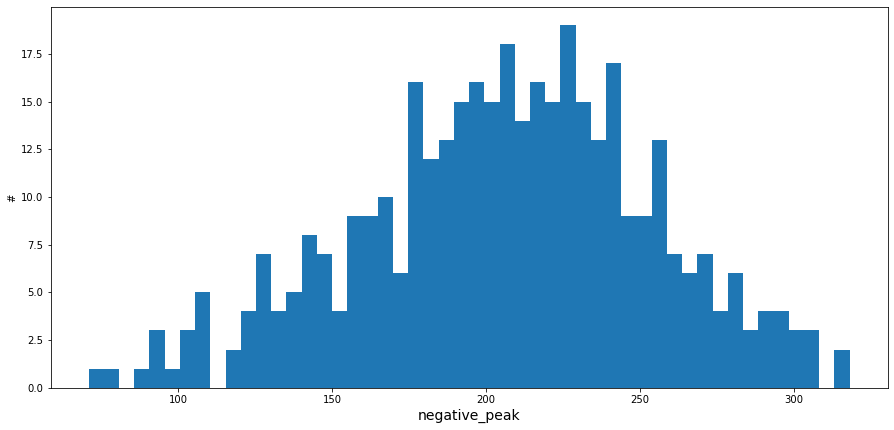

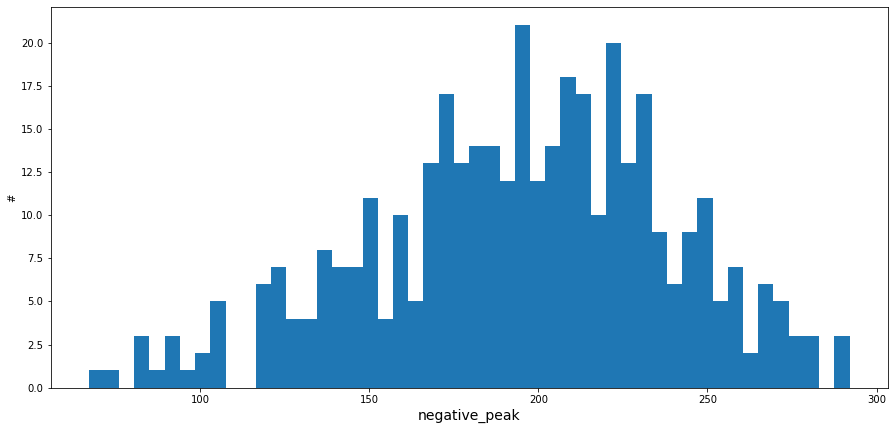

In [97]:
dataIndices = [1, 2, 3]
h5_list = get_h5filenames(mainDir='../data', indexBin=5)
for indexData in dataIndices:
    for indexh5, h5 in enumerate(h5_list):
        getDistribution(indexh5=indexh5, indexData=indexData, indexBin=5, histBin=50)

**Task assigned to us:**<br/>
**Plot an histogram of the pedestal values**

In [99]:
len(data_log[keys_data[0]])

6

In [112]:
len(keys_data)

32

In [102]:
print(type(data_log[keys_data[0]][1]))

<class 'list'>


In [109]:
print(len(data_log[keys_data[0]][1]))

128


In [105]:
print(data_log[keys_data[0]][1])

[2002, 2018, 1989, 2031, 2027, 2020, 2014, 1970, 2036, 2038, 2016, 2027, 2021, 2035, 1995, 2039, 2070, 2023, 2037, 2063, 2060, 2082, 2033, 2050, 2081, 2056, 2085, 2056, 2079, 2097, 2101, 2101, 2093, 2048, 2084, 2057, 1994, 2071, 2031, 2023, 2002, 2067, 2044, 2026, 2078, 2017, 2045, 2040, 2063, 2096, 2088, 2073, 2083, 2067, 2087, 2095, 2016, 2034, 2079, 2088, 2076, 2019, 2076, 2048, 2097, 2103, 2084, 2083, 2052, 2045, 2087, 2151, 2128, 2149, 2051, 2119, 2045, 2079, 2112, 2130, 2006, 2029, 1960, 2033, 1995, 2008, 2066, 2059, 1989, 2021, 2055, 2001, 1998, 2006, 1999, 1980, 2094, 2011, 2081, 2053, 2031, 2054, 2045, 2093, 2042, 2035, 2036, 2036, 2107, 2048, 2095, 2044, 2095, 2078, 2051, 2084, 2033, 2003, 2100, 2129, 2007, 2031, 2063, 2027, 2067, 2059, 2057, 2027]


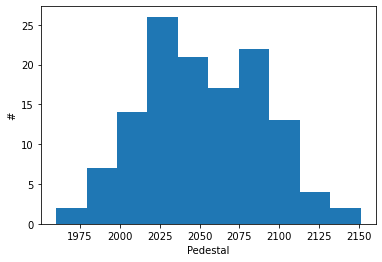

In [111]:
plt.hist(data_log[keys_data[0]][1])
plt.xlabel('Pedestal');plt.ylabel('#')
plt.savefig('test.png')